In [2]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

import numpy as np
import sys
from Utilities.models_2_0 import *
from Utilities.CleanModels import LOADDATA, concatenate_and_sort
from Utilities.CleanPlots import DATAPLOT

from IPython.display import Markdown, display

sys.path.append('/path/to/Utilities')
material_name = "Tungsten"
excel_filename = 'Tungsten/Tungsten.xlsx'

<a id="density"></a>
<h3>2.1. Density</h3>

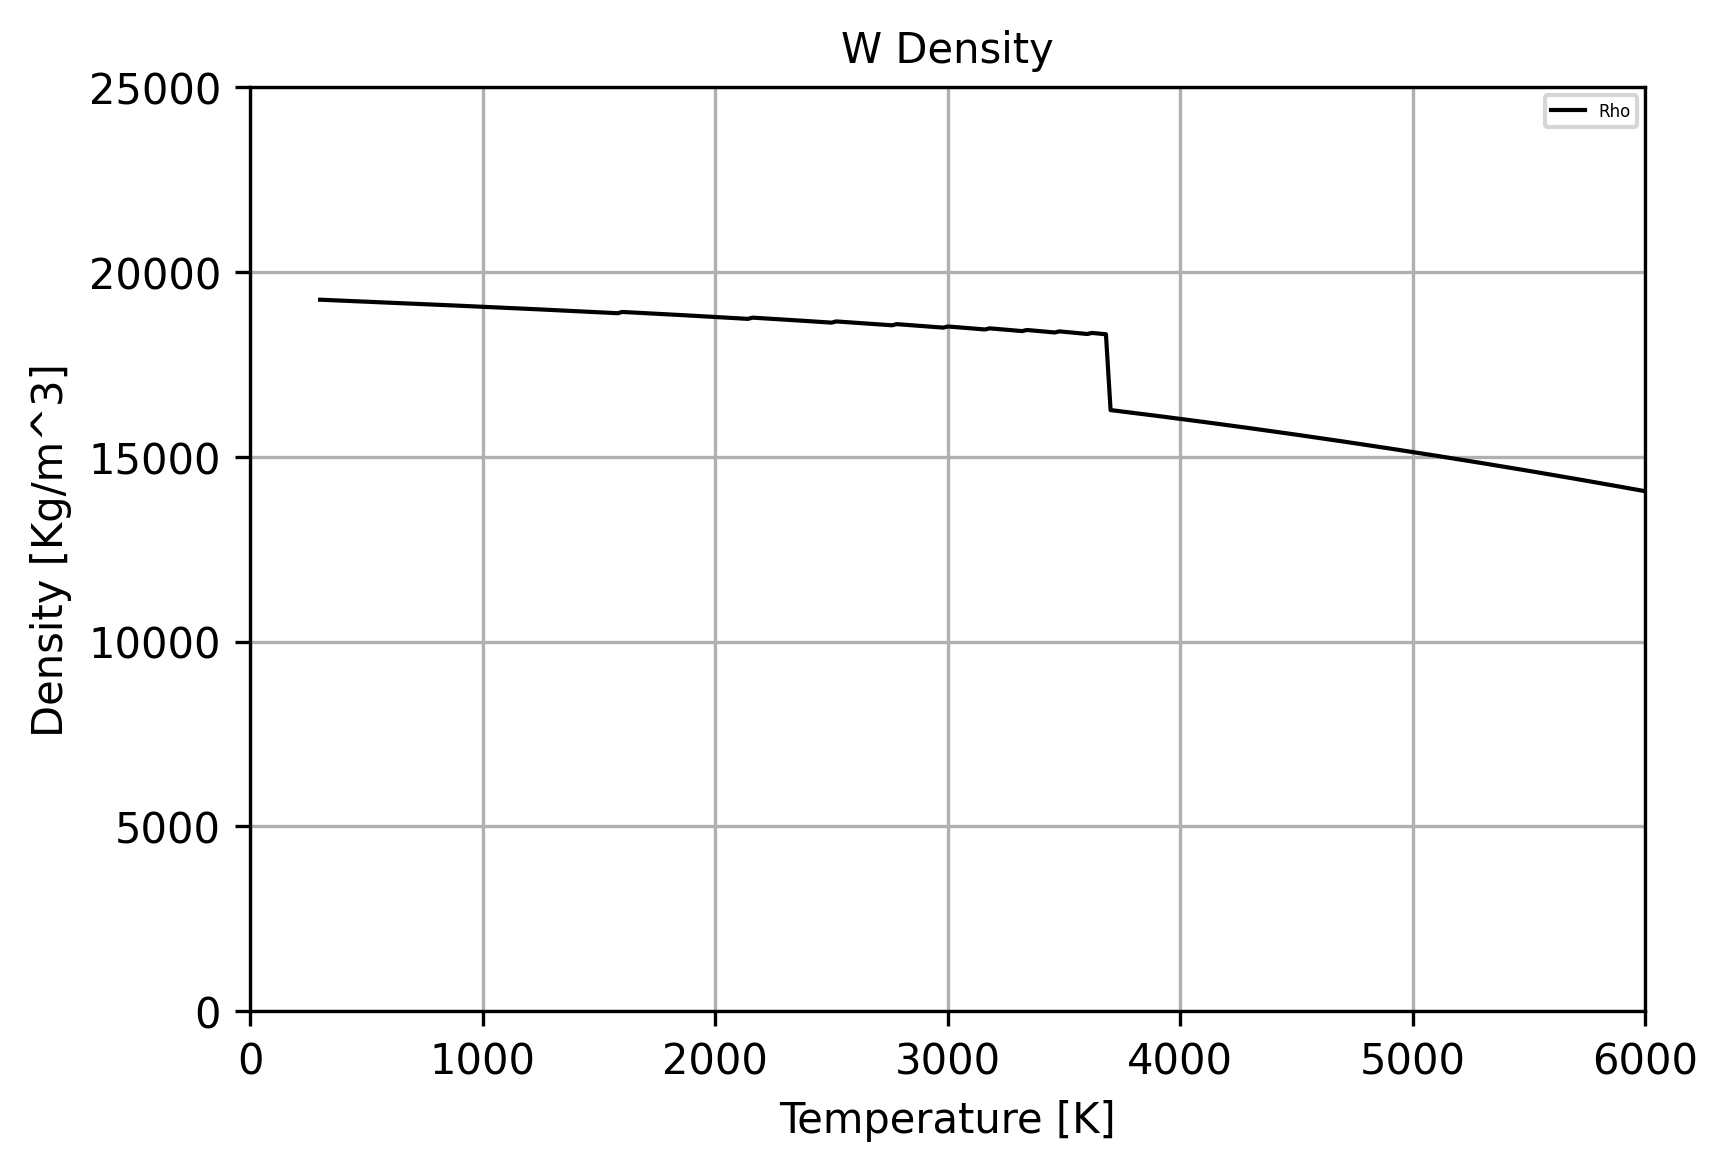

In [3]:
def W_rho(T):
    if 0 <= T <= 3695:
        rho = 19.25 - 2.66207e-4 * (T - 298) - 3.0595e-9 * (T - 298)**2 - 9.5185e-12 * (T - 298)**3
    elif 3695 < T <= 6000:
        rho = 16.267 - 7.679e-4 * (T - 3695) - 8.091e-8 * (T - 3695)**2
    else:
        raise ValueError("Temperature is out of the expected range (0K to 6000K)")
    
    return rho * 1e3

T = np.arange(300, 6001, 20)
rho = [W_rho(t) for t in T]

DATAPLOT(
        x_label='Temperature [K]',
        y_label='Density [Kg/m^3]',
        fit_labels=["Rho"],
        title='W Density',
        x_fit_list=[T],
        y_fit_list=[rho],
        x_lim=[0, 6000],
        y_lim=[0, 25e3]
)

<a id=expansion></a>
<h3>2.2. Coefficient of Thermal Expansion</h3>

,EUROFER97 Temp (F),EUROFER97 Coefficient of Thermal Expansion
2,799.640820,2.423116
3,2195.319239,2.760268
4,3619.283612,4.164268


**Fitting parameters for Tungsten W_CTE** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 3
    # variables        = 3
    chi-square         = 9.8608e-31
    reduced chi-square = 9.8608e-31
    Akaike info crit   = -204.570560
    Bayesian info crit = -207.274724
[[Variables]]
    c0:  3.00160934 +/- 3.8391e-15 (0.00%) (init = 1)
    c1: -0.00142532 +/- 5.9533e-18 (0.00%) (init = 1)
    c2:  8.5539e-07 +/- 1.9828e-21 (0.00%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, c2) = -0.9886
    C(c0, c1) = -0.9679
    C(c0, c2) = +0.9264


**The equations for Tungsten W_CTE are:**


Fit:


<IPython.core.display.Latex object>

Minimum of confidence interval:


<IPython.core.display.Latex object>

Maximum of confidence interval:


<IPython.core.display.Latex object>

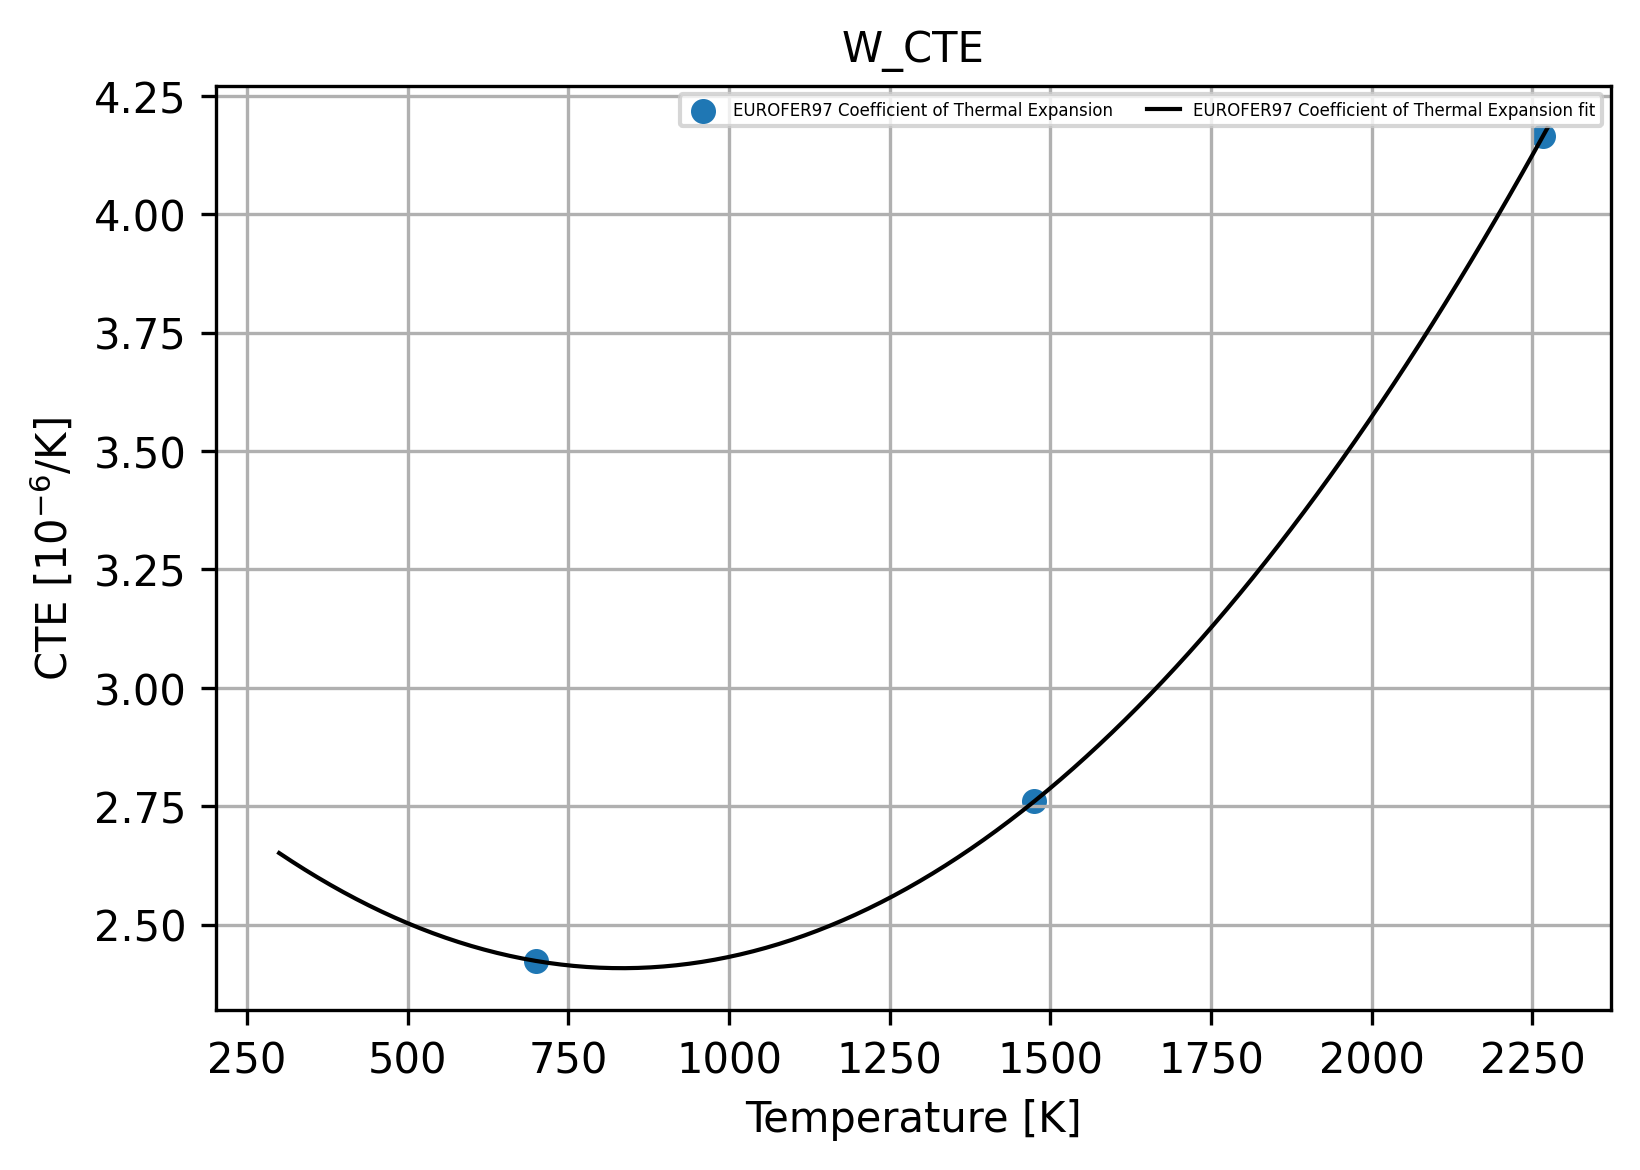


**Data Source:**  
- [Schmnidt1963--THE ENGINEERING PROPERTIES OF TUNGSTEN AND TUNGSTEN ALLOYS.pdf](https://drive.google.com/file/d/1zVKWktn90TJ5NX6dQBbdpRMyT2ylgfMw/view?usp=drive_link)


In [4]:
material_property = "W_CTE"
df = LOADDATA(
    excel_filename = excel_filename,
    material_property = material_property
)
data_labels = np.array(df.keys())[1::2]
x_data_list = [(np.array(df.iloc[:, ::2]).flatten()-32)/1.8 + 273.15]
y_data_list = [np.array(df.iloc[:, 1::2]).flatten()]

p = [1, 1, 1]
T = np.linspace(300,2273.15,100)
fit_result = get_model_fit_and_print_it(
    x_data_list, y_data_list, 
    fit_func='poly', param_initials=p, method='leastsq', material_name=material_name, 
    property_name=material_property, eq_digits=3, print_bool=True)

x_fit_list = []
y_fit_list = []
x_fit_list.append(T)
y_fit_list.append(fit_result.eval(fit_result.params, x=T))

DATAPLOT(
        x_data_list=x_data_list,
        y_data_list=y_data_list,
        x_label='Temperature [K]',
        y_label=r'CTE [$10^{-6}$/K]',
        title=material_property,
        data_labels = data_labels,
        x_fit_list=x_fit_list,
        y_fit_list=y_fit_list
)

display(Markdown("""
**Data Source:**  
- [Schmnidt1963--THE ENGINEERING PROPERTIES OF TUNGSTEN AND TUNGSTEN ALLOYS.pdf](https://drive.google.com/file/d/1zVKWktn90TJ5NX6dQBbdpRMyT2ylgfMw/view?usp=drive_link)
"""))

<a id=cp></a>
<h3>2.3. Specific Heat</h3>

,W Temp (K),W Cp
2,1260.862944,6.774831
3,1350.518020,6.849642
4,1432.294615,6.914544
5,1500.257352,6.989002
6,1600.753775,7.068879
7,1623.412843,7.088809
8,1680.539054,7.153310
9,1714.034647,7.183195
10,1782.021492,7.233203
11,1810.548436,7.302128


**Fitting parameters for Tungsten W_specific_heat** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 22
    # variables        = 4
    chi-square         = 4.47791939
    reduced chi-square = 0.24877330
    Akaike info crit   = -27.0214466
    Bayesian info crit = -22.6572768
    R-squared          = 0.99734226
[[Variables]]
    c0:  59.5446165 +/- 20.1649719 (33.87%) (init = 1)
    c1:  0.15498333 +/- 0.03406524 (21.98%) (init = 1)
    c2: -8.6809e-05 +/- 1.8817e-05 (21.68%) (init = 1)
    c3:  1.8477e-08 +/- 3.4028e-09 (18.42%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9986
    C(c1, c2) = -0.9984
    C(c0, c1) = -0.9982
    C(c1, c3) = +0.9941
    C(c0, c2) = +0.9933
    C(c0, c3) = -0.9859


**The equations for Tungsten W_specific_heat are:**


Fit:


<IPython.core.display.Latex object>

Minimum of confidence interval:


<IPython.core.display.Latex object>

Maximum of confidence interval:


<IPython.core.display.Latex object>

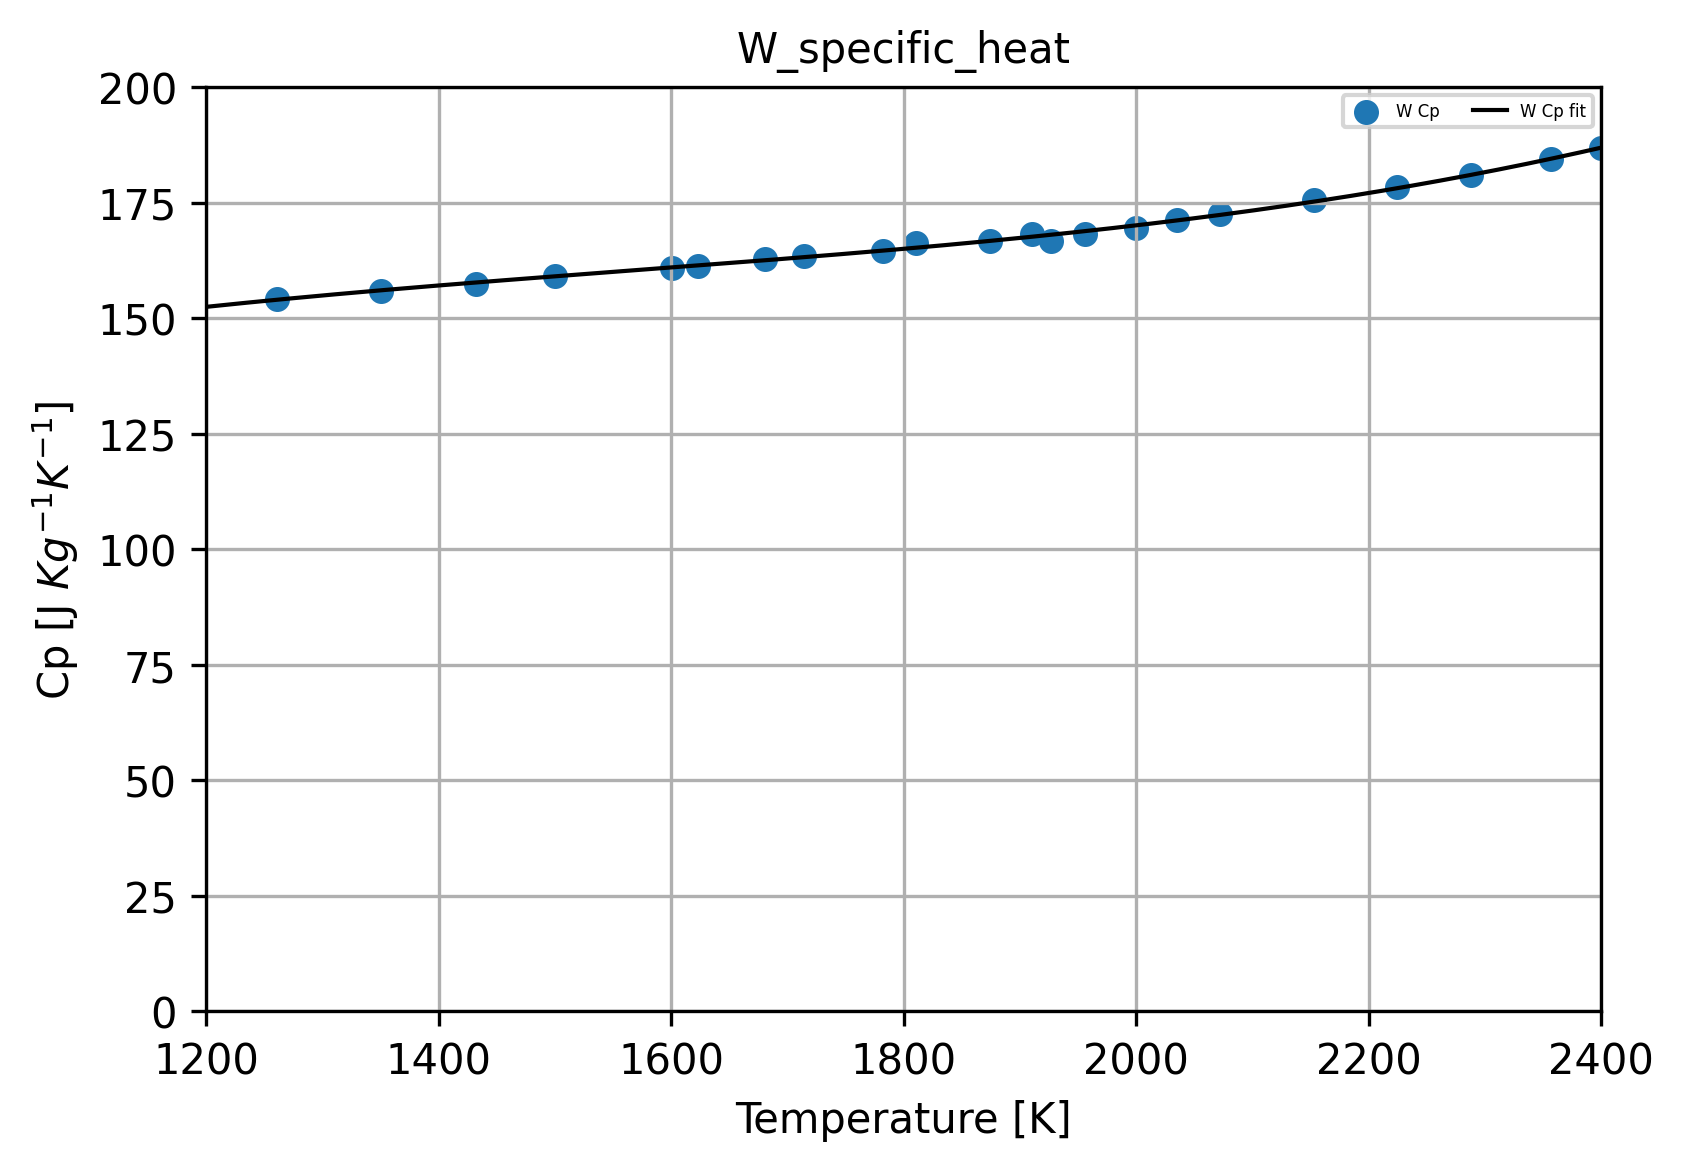


**Data Source:**  
- [Schmnidt1963--THE ENGINEERING PROPERTIES OF TUNGSTEN AND TUNGSTEN ALLOYS.pdf](https://drive.google.com/file/d/1zVKWktn90TJ5NX6dQBbdpRMyT2ylgfMw/view?usp=drive_link)


In [5]:
material_property = "W_specific_heat"
df = LOADDATA(
    excel_filename = excel_filename,
    material_property = material_property
)
data_labels = np.array(df.keys())[1::2]
x_data_list = [np.array(df[i].dropna()) for i in df.iloc[:, ::2]]
y_data_list = [np.array(df[i].dropna())*22.76 for i in df.iloc[:, 1::2]]

p = [1, 1, 1, 1]
T = np.linspace(1200,2400,1200)
T_data, Y_data = concatenate_and_sort(x_data_list, y_data_list)
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)

x_fit_list = []
y_fit_list = []
x_fit_list.append(T)
y_fit_list.append(fit_result.eval(fit_result.params, x=T))

DATAPLOT(
        x_data_list=x_data_list,
        y_data_list=y_data_list,
        x_label='Temperature [K]',
        y_label=r'Cp [J $Kg^{-1} K^{-1}$]',
        title=material_property,
        data_labels = data_labels,
        x_fit_list=x_fit_list,
        y_fit_list=y_fit_list,
        x_lim=[1200, 2400],
        y_lim=[0, 200]
)

display(Markdown("""
**Data Source:**  
- [Schmnidt1963--THE ENGINEERING PROPERTIES OF TUNGSTEN AND TUNGSTEN ALLOYS.pdf](https://drive.google.com/file/d/1zVKWktn90TJ5NX6dQBbdpRMyT2ylgfMw/view?usp=drive_link)
"""))

cp_coef = [fit_result.params[key].value for key in fit_result.params]
def SpecificHeat(T):
    return sum(cp_coef[i] * T**i for i in range(len(cp_coef)))

<a id=conductivity></a>
<h3>2.4. Thermal Conductivity</h3>

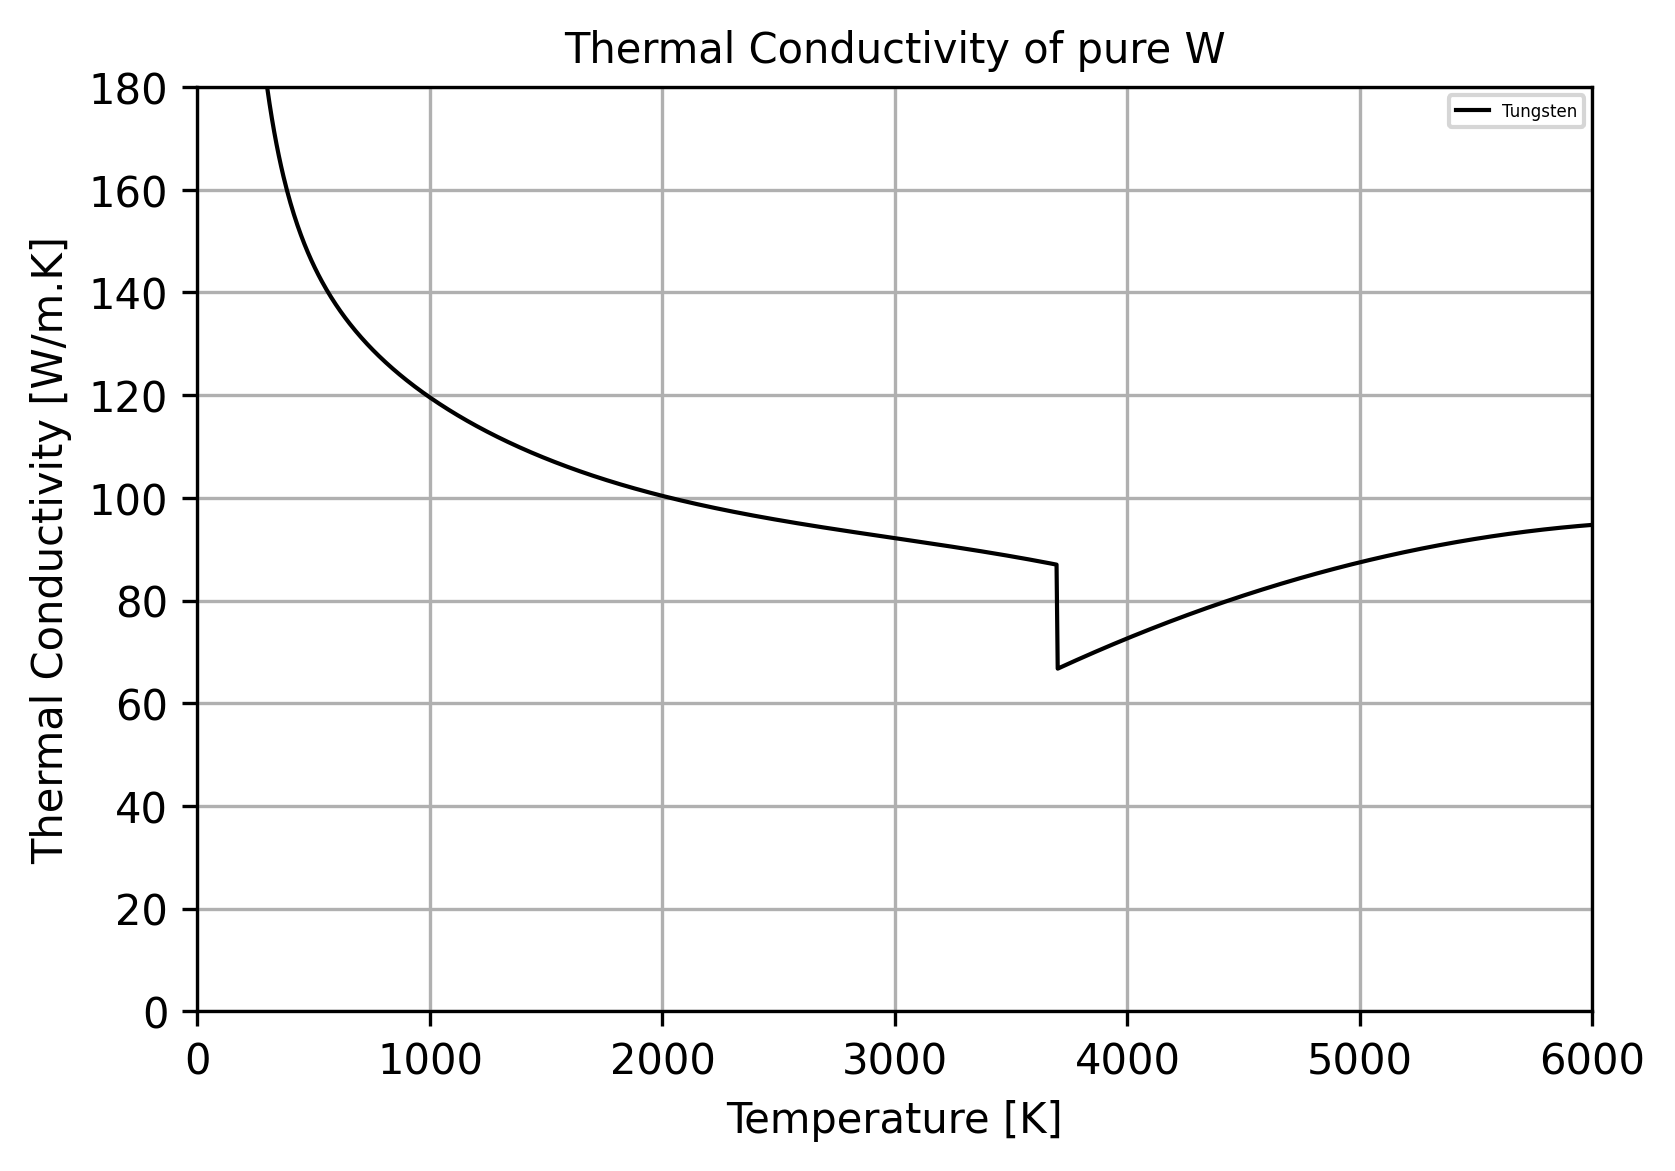


**Data Source:**  
- [Tolias2017--thermophysical properties of solid and liquid tungsten relevant.pdf](https://drive.google.com/file/d/1yjf497SdhnkfiJqxQwKkY1LkHd0omkAP/view?usp=drive_link)


In [6]:
def W_k(T):
    if 300 <= T <= 3695:
        k = 149.441 - 45.466e-3 * T + 13.193e-6 * T**2 - 1.484e-9 * T**3 + 3.866e6 / (T**2)
    elif 3695 < T <= 6000:
        k = 66.6212 + 0.02086 * (T - 3695) - 3.7585e-6 * (T - 3695)**2
    else:
        raise ValueError("Temperature is out of the expected range (300K to 6000K)")
    
    return k

T = np.arange(300, 6001, 5)
k = np.array([W_k(int(t)) for t in T])

DATAPLOT(
        x_label='Temperature [K]',
        y_label='Thermal Conductivity [W/m.K]',
        fit_labels=["Tungsten"],
        title='Thermal Conductivity of pure W',
        x_fit_list=[T],
        y_fit_list=[k],
        x_lim=[0, 6000],
        y_lim=[0, 180]
)

display(Markdown("""
**Data Source:**  
- [Tolias2017--thermophysical properties of solid and liquid tungsten relevant.pdf](https://drive.google.com/file/d/1yjf497SdhnkfiJqxQwKkY1LkHd0omkAP/view?usp=drive_link)
"""))

,W Pure Temp (C),W Pure Thermal Conductivity (W/m k),W K-doped Temp (C),W K-doped Thermal Conductivity (W/m k),W 1%Re Temp (C),W 1%Re Thermal Conductivity (W/m k),W 3%Re Temp (C),W 3%Re Thermal Conductivity (W/m k),W K-doped 3%Re Temp (C),W K-doped 3%Re Thermal Conductivity (W/m k),W K-doped Rod Temp (C),W K-doped Rod Thermal Conductivity (W/m k)
2,34.348089,175.566265,32.567222,167.662651,32.161059,147.614458,26.552889,110.795181,31.458085,112.915663,21.350882,174.024096
3,105.680420,176.530120,98.900627,161.879518,96.881529,142.216867,99.474722,110.216867,99.564547,114.650602,97.408760,168.240964
4,204.221749,160.530120,200.859190,154.554217,201.894124,125.638554,196.660874,107.325301,198.406592,113.493976,200.765461,149.927711
5,302.821659,147.421687,301.138427,144.337349,302.235848,118.506024,300.341723,105.012048,303.688661,110.216867,297.807112,139.903614
6,401.566070,141.445783,399.871121,137.783133,402.722071,118.506024,402.483841,106.746988,400.945109,110.795181,399.789108,133.734940
7,501.981996,137.975904,503.563687,136.048193,503.200484,118.120482,502.981781,107.325301,504.688446,111.566265,501.782820,128.144578
8,602.362774,132.771084,602.343247,131.807229,603.647654,116.192771,600.214798,106.746988,603.550019,111.373494,600.562379,123.903614
9,704.356486,127.180723,701.138427,128.337349,700.892386,116.192771,700.693210,106.361446,700.783035,110.795181,699.369276,121.012048
10,801.484056,121.397590,799.921892,124.289157,802.995450,116.000000,801.191150,106.939759,798.027767,110.795181,803.038410,118.120482
11,901.915604,118.698795,901.962469,121.012048,901.860928,116.000000,901.665658,106.361446,903.325457,108.289157,901.896077,117.734940


Data Fit W
Fit:


<IPython.core.display.Latex object>

Data Fit W with Re
Fit:


<IPython.core.display.Latex object>

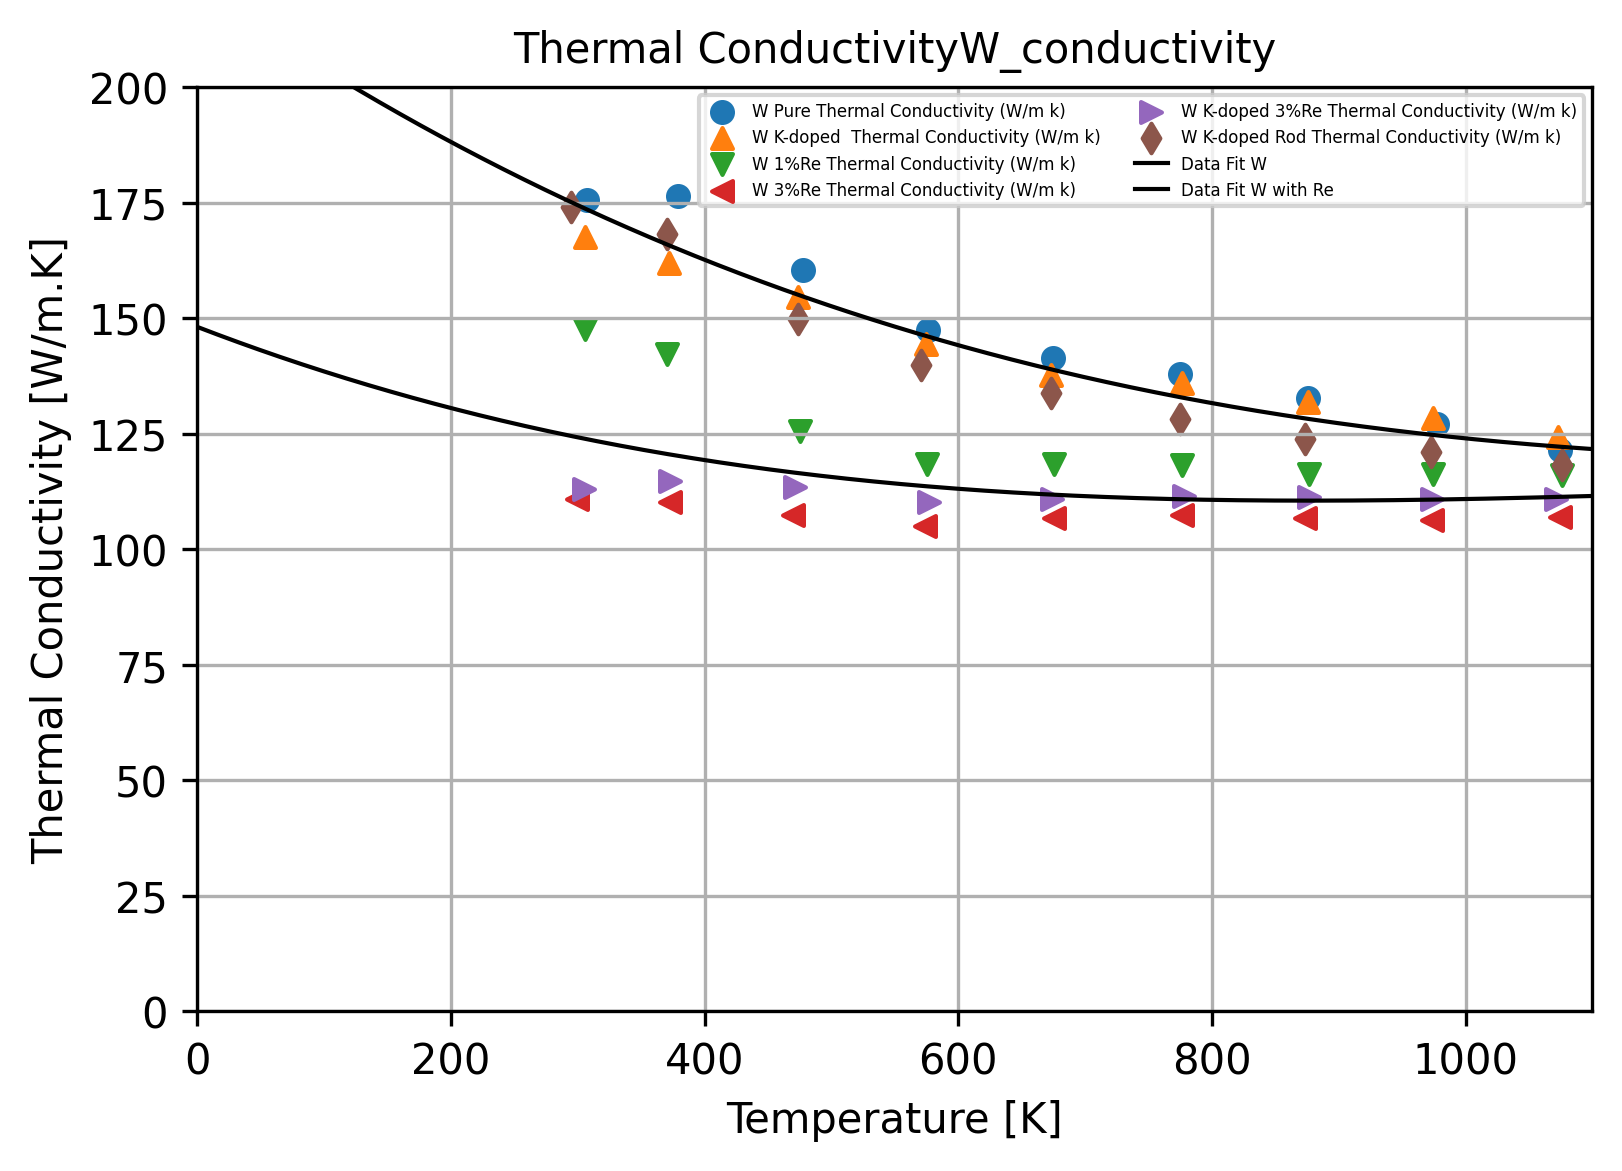


**Data Source:**  
- [Nogami2021-- Mechanical properties of tungsten-Recent research on modified tungsten materials in Japan](https://drive.google.com/file/d/1zauZKW21QloQ4LA3BcDXD8PHHT6UuJVX/view?usp=drive_link)


In [7]:
material_property = "W_conductivity"
df = LOADDATA(
    excel_filename = excel_filename,
    material_property = material_property
)

data_labels = np.array(df.keys())[1::2]
x_data_list = np.array(df.iloc[:, ::2]).T + 273.15
y_data_list = np.array(df.iloc[:, 1::2]).T

p = [1, 1, 1, 1]
T = np.linspace(0,1100 + 273.15, 1100)
fit_labels = ['Data Fit W', 'Data Fit W with Re']

print(fit_labels[0])
fit_result0 = get_model_fit_and_print_it(x_data_list[[0,1,5]].flatten(), y_data_list[[0,1,5]].flatten(), fit_func='poly', param_initials=p, method='leastsq', material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True, print_params_bool=False)
print(fit_labels[1])
fit_result1 = get_model_fit_and_print_it(x_data_list[[2,3,4]].flatten(), y_data_list[[2,3,4]].flatten(), fit_func='poly', param_initials=p, method='leastsq', material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True, print_params_bool=False)

x_fit_list = [T, T]
y_fit_list = []

y_fit_list.append(fit_result0.eval(fit_result0.params, x=T))
y_fit_list.append(fit_result1.eval(fit_result1.params, x=T))



DATAPLOT(
        x_data_list=x_data_list,
        y_data_list=y_data_list,
        x_label='Temperature [K]',
        y_label=r'Thermal Conductivity [W/m.K]',
        title='Thermal Conductivity' + material_property,
        data_labels = data_labels,
        x_fit_list=x_fit_list,
        y_fit_list=y_fit_list,
        fit_labels=fit_labels,
        x_lim=[0, 1100],
        y_lim=[0, 200]
)

rho_coeff = [fit_result0.params[key].value for key in fit_result0.params]

def ThermalConductivity(T):
    return sum(rho_coeff[i] * T**i for i in range(len(rho_coeff)))

display(Markdown("""
**Data Source:**  
- [Nogami2021-- Mechanical properties of tungsten-Recent research on modified tungsten materials in Japan](https://drive.google.com/file/d/1zauZKW21QloQ4LA3BcDXD8PHHT6UuJVX/view?usp=drive_link)
"""))

<a id=diffusivity></a>
<h3>2.5. Thermal Diffusivity</h3>

,W-Fujitsuka Temp (C),W-Fujitsuka Thermal Diffusivity Coef. (mm2/s),W-tanabe Temp (C),W-tanabe Thermal Diffusivity Coef. (mm2/s),W-Touloukian Temp (C),W-Touloukian Thermal Diffusivity Coef. (mm2/s),W-Single Crystal Temp (C),W-Single Crystal Thermal Diffusivity Coef. (mm2/s)
2,28.201282,71.586071,20.588269,64.556553,23.302820,66.200865,26.069032,68.796319
3,120.537905,69.786949,142.500900,59.774810,78.707603,62.819626,95.101018,64.397353
4,173.971327,65.341435,179.905802,57.562509,120.015090,59.687661,196.352816,58.208601
5,204.686914,61.333514,467.840243,49.052184,221.450146,54.367032,293.027000,53.633560
6,285.317603,60.804963,549.340853,47.167562,325.739377,50.866130,391.670972,51.749179
7,343.121446,54.843398,670.097187,45.166693,426.279736,47.992158,495.298409,49.429797
8,450.093666,51.627290,758.253427,43.927735,522.131093,45.745004,591.253669,47.493850
9,553.402218,48.508590,NaN,NaN,623.629057,43.812208,NaN,NaN
10,642.800094,46.366668,NaN,NaN,722.308960,42.004553,NaN,NaN
11,756.401983,44.863605,NaN,NaN,824.751714,40.322820,NaN,NaN


**Fitting parameters for Tungsten W_diffusivity** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 37
    # variables        = 4
    chi-square         = 228.748636
    reduced chi-square = 6.93177684
    Akaike info crit   = 75.4031156
    Bayesian info crit = 81.8467873
    R-squared          = 0.93177780
[[Variables]]
    c0:  88.4389592 +/- 6.54760404 (7.40%) (init = 1)
    c1: -0.08321354 +/- 0.02931328 (35.23%) (init = 1)
    c2:  5.1314e-05 +/- 3.9104e-05 (76.20%) (init = 1)
    c3: -1.3226e-08 +/- 1.5926e-08 (120.42%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9928
    C(c1, c2) = -0.9908
    C(c0, c1) = -0.9856
    C(c1, c3) = +0.9686
    C(c0, c2) = +0.9568
    C(c0, c3) = -0.9215


**The equations for Tungsten W_diffusivity are:**


Fit:


<IPython.core.display.Latex object>

Minimum of confidence interval:


<IPython.core.display.Latex object>

Maximum of confidence interval:


<IPython.core.display.Latex object>

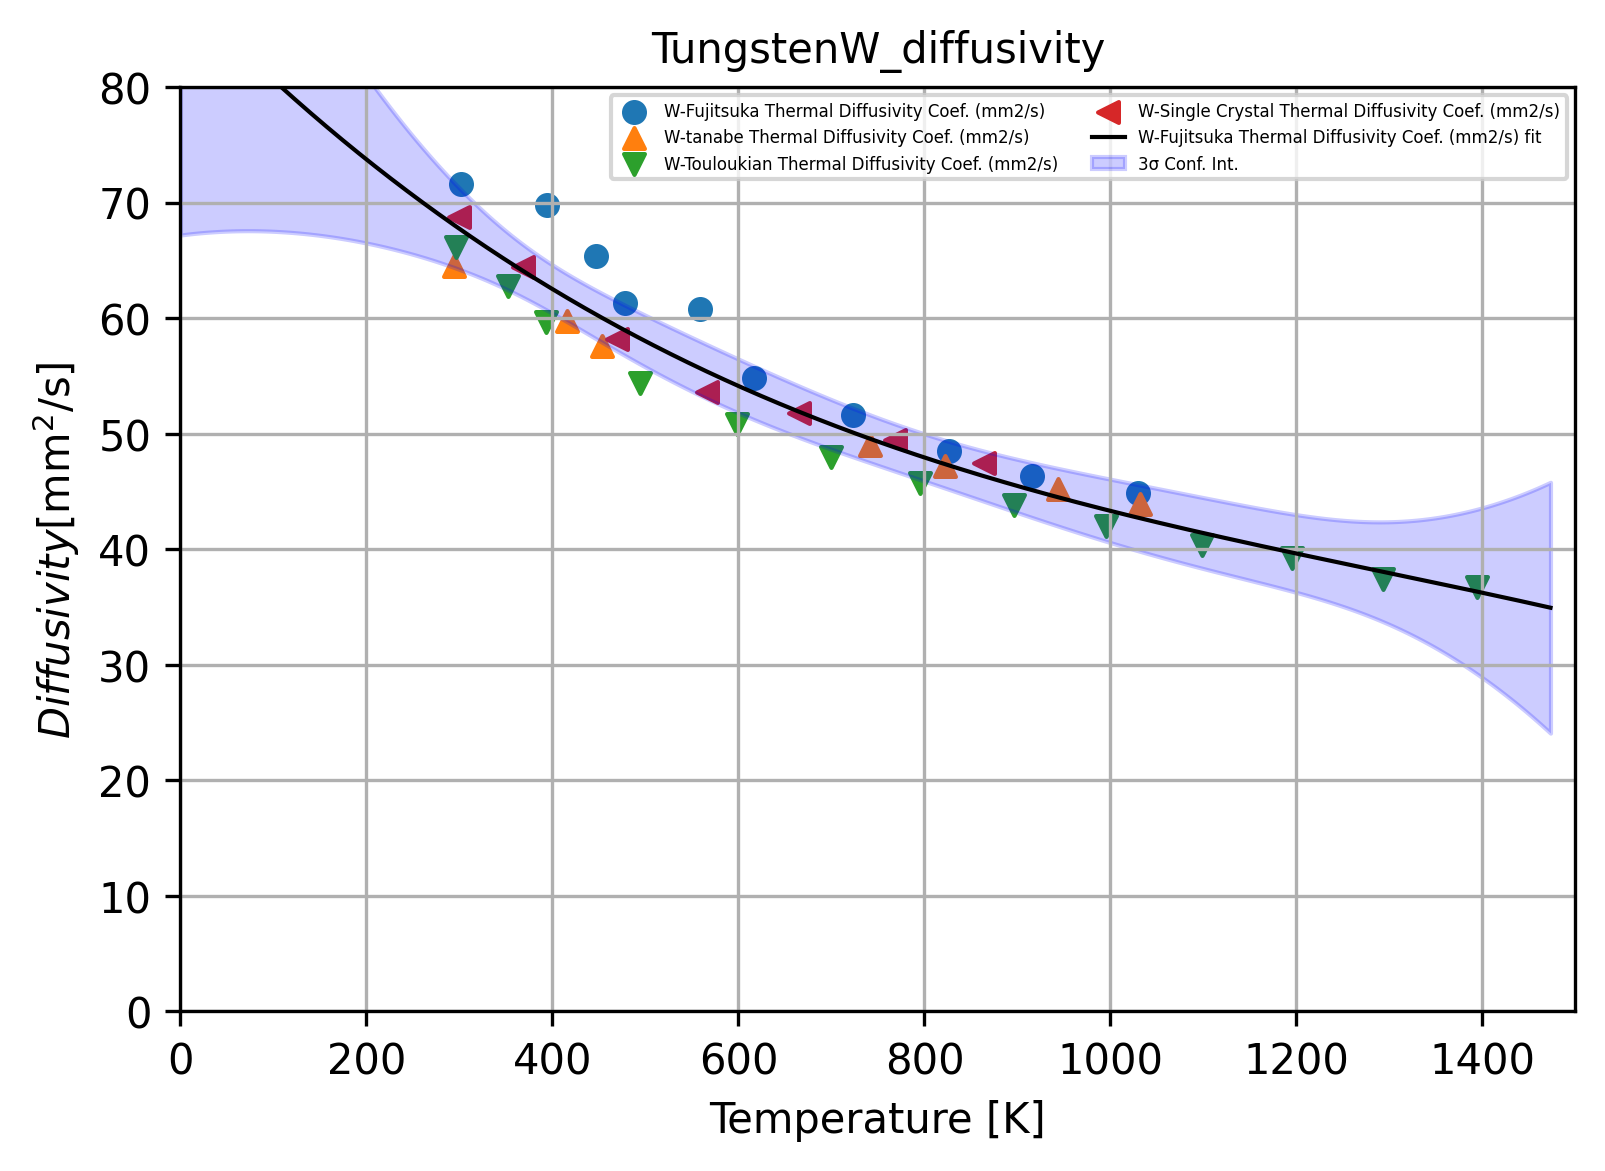


**Data Source:**  
- [Fukuda2018--Thermal properties of pure tungsten and its alloys for fusion applications](https://drive.google.com/file/d/1HnPIj_yDMyvEg-_nyPLBX7_9lSo6nPlP/view?usp=drive_link)  
- [Tanabe2003--Temperature dependence of thermal conductivity in W and W–Re alloys from 300 to 1000 K](https://drive.google.com/file/d/1J9fqNc03hZZMfeQ57RfdYDqfaMAiDhWY/view?usp=drive_link)  
- [Touloukian1974--Thermophysical Properties of Matter-The TPRC Data Series. Volume 10. Thermal Diffusivity](https://drive.google.com/file/d/1MQrFR5Kc7M4WEu0LpVEUsT3CWVTF1yF6/view?usp=drive_link)  
- [Fujitsuka2000--Effect of neutron irradiation on thermal diffusivity of tungsten–rhenium alloys](https://drive.google.com/file/d/1LlHMZ-vDTaWnlpitQPfjvOoO5xZGedNo/view?usp=drive_link)


In [8]:
material_property = "W_diffusivity"
df = LOADDATA(
    excel_filename = excel_filename,
    material_property = material_property
)
data_labels = np.array(df.keys())[1::2]
x_data_list = [np.array(df[i].dropna())+273.15 for i in df.iloc[:, ::2]]
y_data_list = [np.array(df[i].dropna()) for i in df.iloc[:, 1::2]]
T_data, Y_data = concatenate_and_sort(x_data_list, y_data_list)

p = [1, 1, 1, 1]
T = np.linspace(0,1200 + 273.15,1200)
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)

x_fit_list = [T]
y_fit_list = [fit_result.eval(fit_result.params, x=T)]

DATAPLOT(
        x_data_list=x_data_list,
        y_data_list=y_data_list,
        x_label='Temperature [K]',
        y_label=r'$Diffusivity [$mm$^2$/s]',
        title='Tungsten' + material_property,
        data_labels = data_labels,
        x_fit_list=x_fit_list,
        y_fit_list=y_fit_list,
        x_lim=[0, 1500],
        y_lim=[0, 80],
        conf_int=True,
        dely=fit_result.eval_uncertainty(sigma=3, x=T)
)


display(Markdown("""
**Data Source:**  
- [Fukuda2018--Thermal properties of pure tungsten and its alloys for fusion applications](https://drive.google.com/file/d/1HnPIj_yDMyvEg-_nyPLBX7_9lSo6nPlP/view?usp=drive_link)  
- [Tanabe2003--Temperature dependence of thermal conductivity in W and W–Re alloys from 300 to 1000 K](https://drive.google.com/file/d/1J9fqNc03hZZMfeQ57RfdYDqfaMAiDhWY/view?usp=drive_link)  
- [Touloukian1974--Thermophysical Properties of Matter-The TPRC Data Series. Volume 10. Thermal Diffusivity](https://drive.google.com/file/d/1MQrFR5Kc7M4WEu0LpVEUsT3CWVTF1yF6/view?usp=drive_link)  
- [Fujitsuka2000--Effect of neutron irradiation on thermal diffusivity of tungsten–rhenium alloys](https://drive.google.com/file/d/1LlHMZ-vDTaWnlpitQPfjvOoO5xZGedNo/view?usp=drive_link)
"""))


diffusivity_coef = [fit_result.params[key].value for key in fit_result.params]
def ThermalDiffusivity(T):
    return sum(diffusivity_coef[i] * T**i for i in range(len(diffusivity_coef)))

<a id=emissivity></a>
<h3>2.6. Thermal Emissivity</h3>

,W Minissale_short Temp (K),W Minissale_short Thermal Emissivity,W Minissale_long Temp (K),W Minissale_long Thermal Emissivity,W Minissale_intermediate Temp (K),W Minissale_intermediate Thermal Emissivity,W Brodu Temp (K),W Brodu Thermal Emissivity,W Rudkin Temp (K),W Rudkin Thermal Emissivity,W Matsumoto Temp (K),W Matsumoto Thermal Emissivity,W Worthing Temp (K),W Worthing Thermal Emissivity
2,42.44,0.02905,38.40,0.01385,43.07,0.01643,853.44,0.06718,1364.00,0.27669,1833.14,0.23873,1345.01,0.19629
3,158.90,0.04481,160.25,0.02073,156.92,0.02264,884.53,0.08141,1683.16,0.31258,1959.11,0.25306,1869.29,0.26863
4,276.74,0.06636,273.45,0.03824,277.69,0.03753,925.21,0.11031,1961.84,0.33309,2079.38,0.26529,2416.00,0.31879
5,461.49,0.10078,457.42,0.06514,460.21,0.06141,1024.28,0.15948,2244.50,0.34633,2163.37,0.27372,2958.98,0.34808
6,589.35,0.13616,610.29,0.08453,593.49,0.08716,1125.40,0.20176,2542.71,0.35573,2258.82,0.28299,3500.04,0.37027
7,724.59,0.16511,706.32,0.11330,721.15,0.11167,1160.33,0.22246,2819.71,0.35787,2354.32,0.28890,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,1240.15,0.24877,NaN,NaN,2447.86,0.29859,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,1343.66,0.25999,NaN,NaN,2541.46,0.30323,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,1349.31,0.27551,NaN,NaN,2682.83,0.30955,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,1427.43,0.28414,NaN,NaN,2789.79,0.31630,NaN,NaN


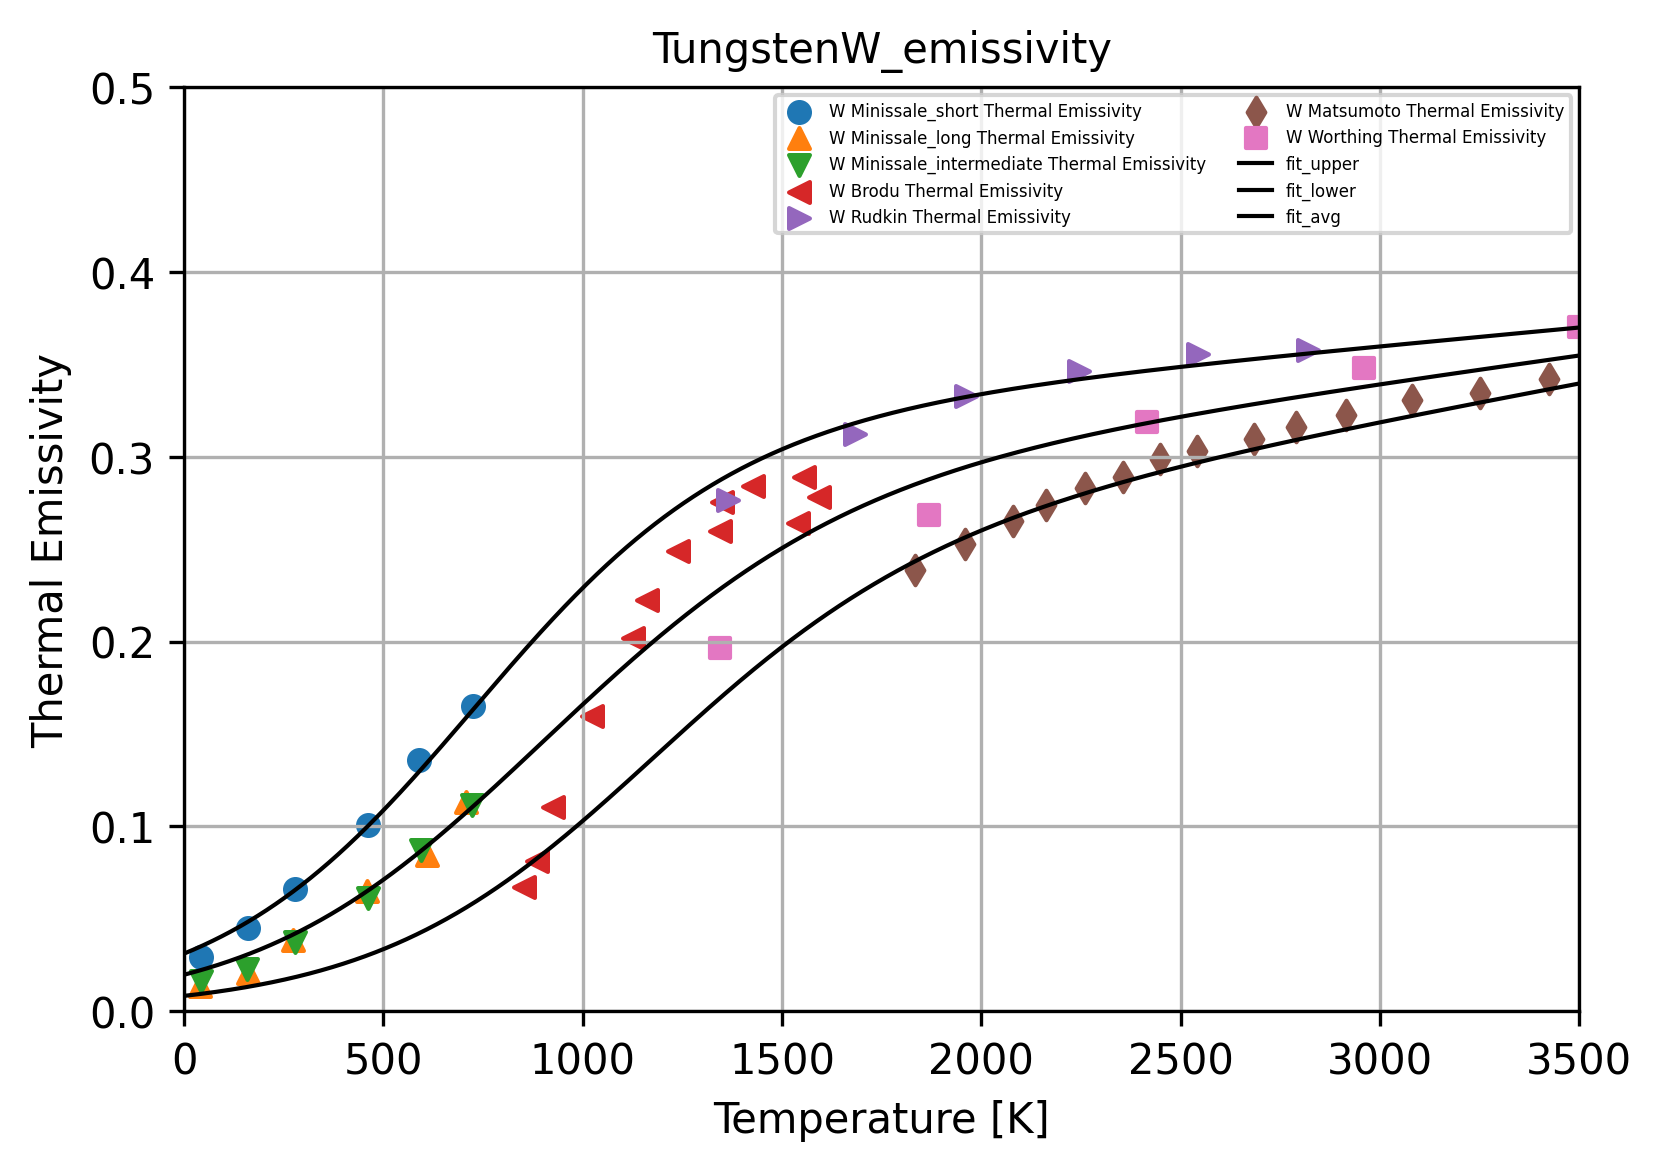

In [9]:
material_property = "W_emissivity"
df = LOADDATA(
    excel_filename = excel_filename,
    material_property = material_property
)

data_labels = np.array(df.keys())[1::2]
x_data_list = [np.array(df[i].dropna()) for i in df.iloc[:, ::2]]
y_data_list = [np.array(df[i].dropna()) for i in df.iloc[:, 1::2]]

# Define the fit functions for the upper (εu), lower (εl), and average emissivity (εavg)
epsilon_avg_func = lambda T: (epsilon_upper_func(T)+epsilon_lower_func(T))/2
epsilon_upper_func = lambda T: 0.5 * (0.55 + 2e-5 * T - 0.25) * (1 + np.tanh((T - 700) / 650))
epsilon_lower_func = lambda T: 0.5 * (0.45 + 4e-5 * T - 0.25) * (1 + np.tanh((T - 1100) / 700))

# Example usage: Generate the fitted data
T = np.linspace(0,3500,3500)
Y_fit_avg = epsilon_avg_func(T)
Y_fit_upper = epsilon_upper_func(T)
Y_fit_lower = epsilon_lower_func(T)

DATAPLOT(
        x_data_list=x_data_list,
        y_data_list=y_data_list,
        x_label='Temperature [K]',
        y_label=r'Thermal Emissivity',
        title='Tungsten' + material_property,
        data_labels = data_labels,
        x_fit_list=[T,T,T],
        y_fit_list=[Y_fit_upper, Y_fit_lower, Y_fit_avg],
        x_lim=[0, 3500],
        y_lim=[0, 0.5],
        fit_labels=["fit_upper", "fit_lower", "fit_avg"]
)


NormalEmissivity = epsilon_avg_func

<a id=resistivity></a>
<h3>2.7. Electrical Resistivity</h3>

,W Forsythe Temp (K),W Forsythe Electrical Resistivity (x10-8 ohm-m),W Desia Temp (K),W Desia Electrical Resistivity (x10-8 ohm-m),W Rudkin Temp (K),W Rudkin Electrical Resistivity (x10-8 ohm-m)
2,300.0,7.18,10.0,0.000137,1540.61,39.63
3,400.0,10.26,15.0,0.000567,1810.32,51.19
4,500.0,13.66,20.0,0.001960,2079.63,57.10
5,600.0,17.23,30.0,0.013300,2345.26,67.27
6,800.0,24.80,40.0,0.054300,2610.41,81.49
7,900.0,28.75,50.0,0.141000,NaN,NaN
8,1000.0,32.73,60.0,0.266000,NaN,NaN
9,1100.0,36.84,70.0,0.422000,NaN,NaN
10,1200.0,40.80,80.0,0.606000,NaN,NaN
11,1300.0,44.90,90.0,0.809000,NaN,NaN


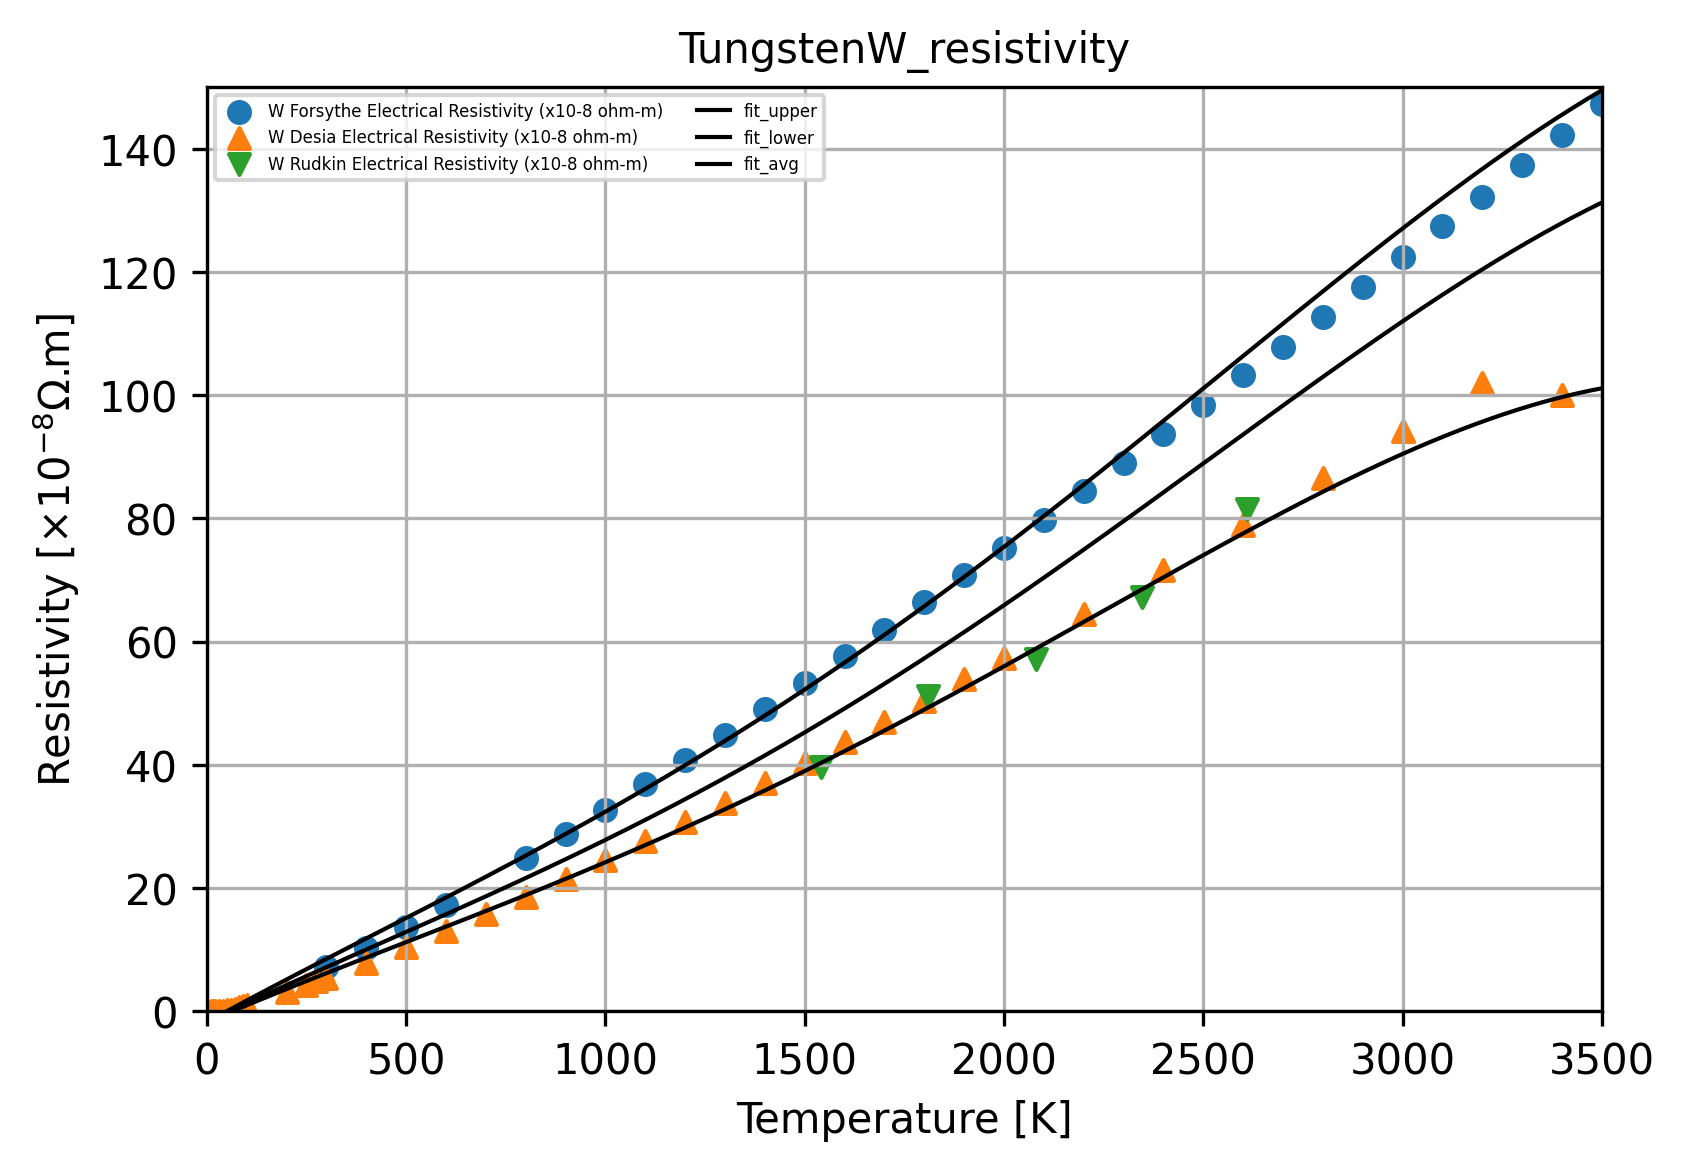

In [10]:
material_property = "W_resistivity"
df = LOADDATA(
    excel_filename = excel_filename,
    material_property = material_property
)

data_labels = np.array(df.keys())[1::2]
x_data_list = [np.array(df[i].dropna()) for i in df.iloc[:, ::2]]
y_data_list = [np.array(df[i].dropna()) for i in df.iloc[:, 1::2]]

# Define the fit functions for the upper (εu), lower (εl), and average emissivity (εavg)
rho_avg_func = lambda T: -1.005e-12 * T**4 + 5.943e-9 * T**3 - 6.539e-6 * T**2 + 0.031187 * T - 1.784
rho_upper_func = lambda T: -1.005e-12 * T**4 + 6e-9 * T**3 - 6.539e-6 * T**2 + 0.0357 * T - 1.784
rho_lower_func = lambda T: -1.005e-12 * T**4 + 5.5e-9 * T**3 - 6.539e-6 * T**2 + 0.028 * T - 1.784

# Example usage: Generate the fitted data
T = np.linspace(0,3500,3500)
Y_fit_avg = rho_avg_func(T)
Y_fit_upper = rho_upper_func(T)
Y_fit_lower = rho_lower_func(T)

DATAPLOT(
        x_data_list=x_data_list,
        y_data_list=y_data_list,
        x_label='Temperature [K]',
        y_label=r'Resistivity [$\times 10^{-8} \Omega$.m]',
        title='Tungsten' + material_property,
        data_labels = data_labels,
        x_fit_list=[T,T,T],
        y_fit_list=[Y_fit_upper, Y_fit_lower, Y_fit_avg],
        x_lim=[0, 3500],
        y_lim=[0, 150],
        fit_labels=["fit_upper", "fit_lower", "fit_avg"]
)


ElectricalResistivity = rho_avg_func

<a id="section-3"></a>
<h2>Section 3: Mechanical Properties</h2>
<a id=Young></a>
<h3>3.1. Young's Modulus</h3> 

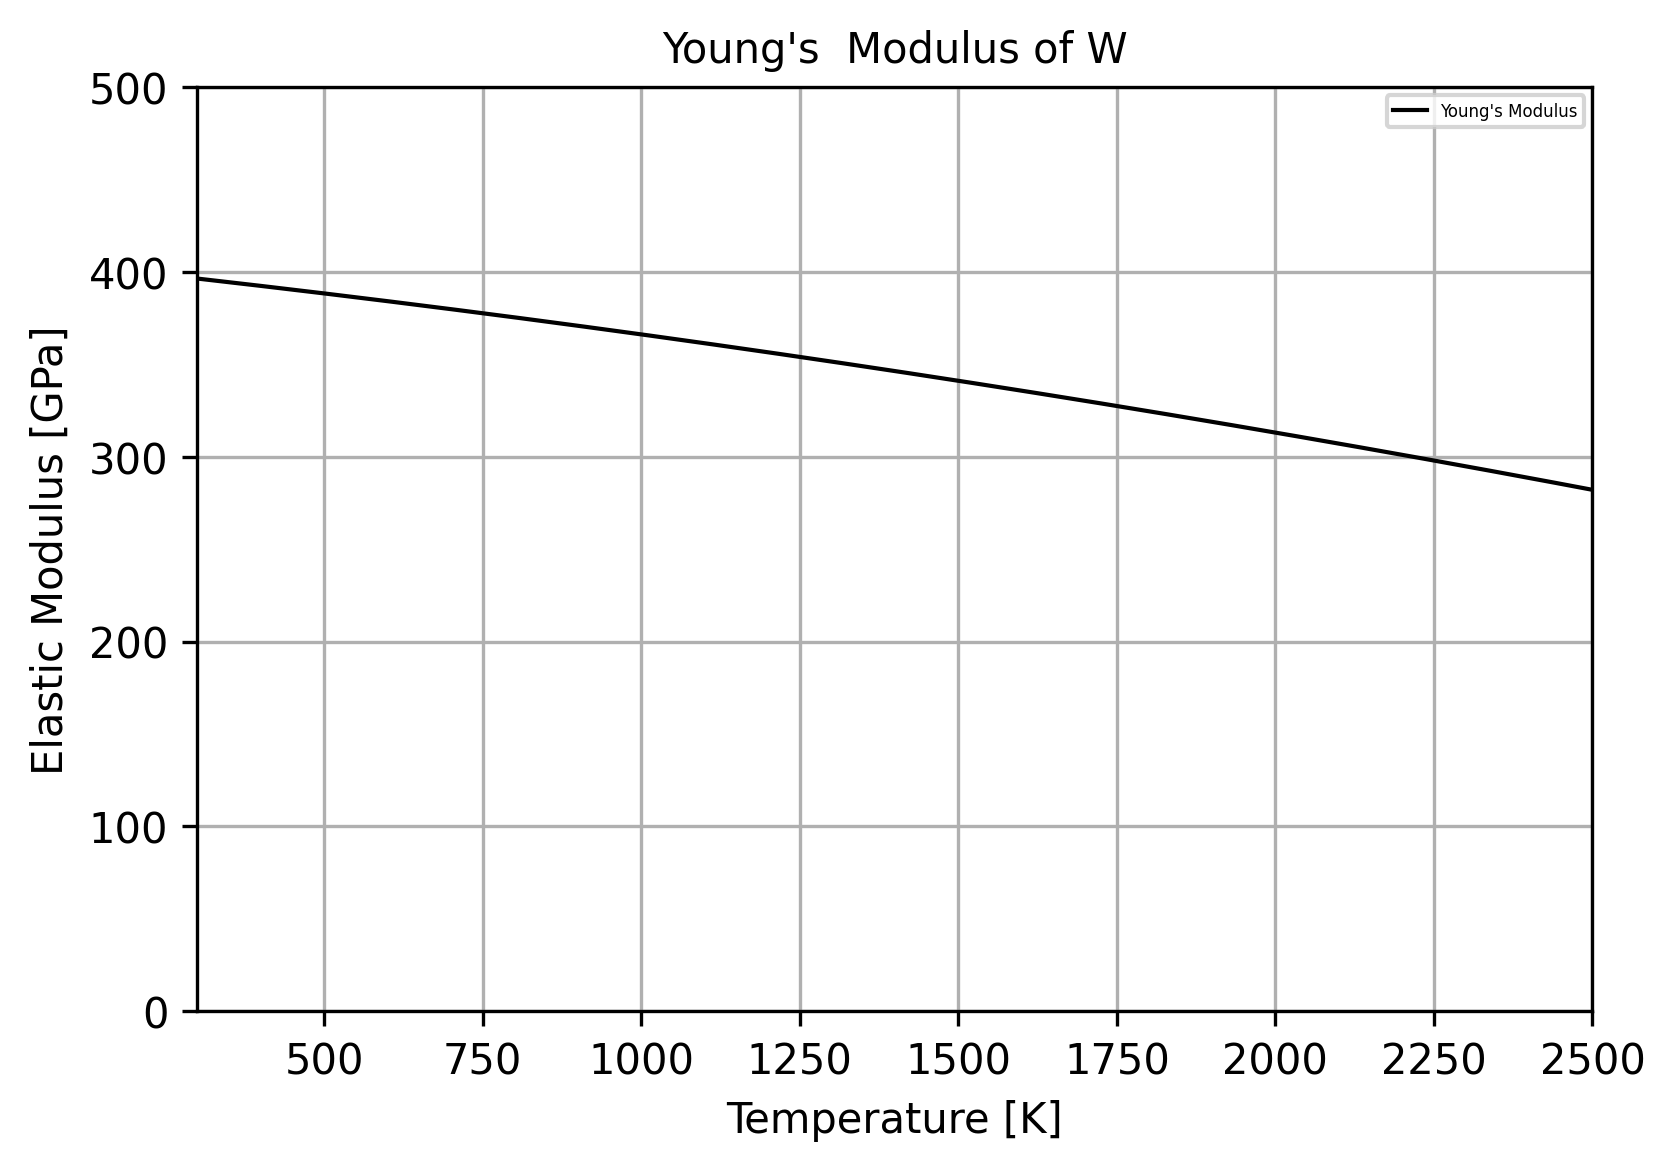


**Data Source:**  
- [Tolias2017--thermophysical properties of solid and liquid tungsten relevant](https://drive.google.com/file/d/1yjf497SdhnkfiJqxQwKkY1LkHd0omkAP/view?usp=drive_link)


In [11]:
def Young(T):
    return 4.0761e11 - 3.5521e7 * T - 5.871e3 * T**2

# Calculate the elastic modulus (E) in GPa
T = np.linspace(0,3500,3500)
E = np.array([Young(t) for t in T]) * 1e-9



DATAPLOT(
        x_label='Temperature [K]',
        y_label='Elastic Modulus [GPa]',
        fit_labels=["Young's Modulus"],
        title="Young's Modulus of W",
        x_fit_list=[T],
        y_fit_list=[E],
        x_lim=[300, 2500],
        y_lim=[0, 500]
)

display(Markdown("""
**Data Source:**  
- [Tolias2017--thermophysical properties of solid and liquid tungsten relevant](https://drive.google.com/file/d/1yjf497SdhnkfiJqxQwKkY1LkHd0omkAP/view?usp=drive_link)
"""))

<a id=Poisson></a>
<h3>3.2. Poisson's Ratio</h3> 

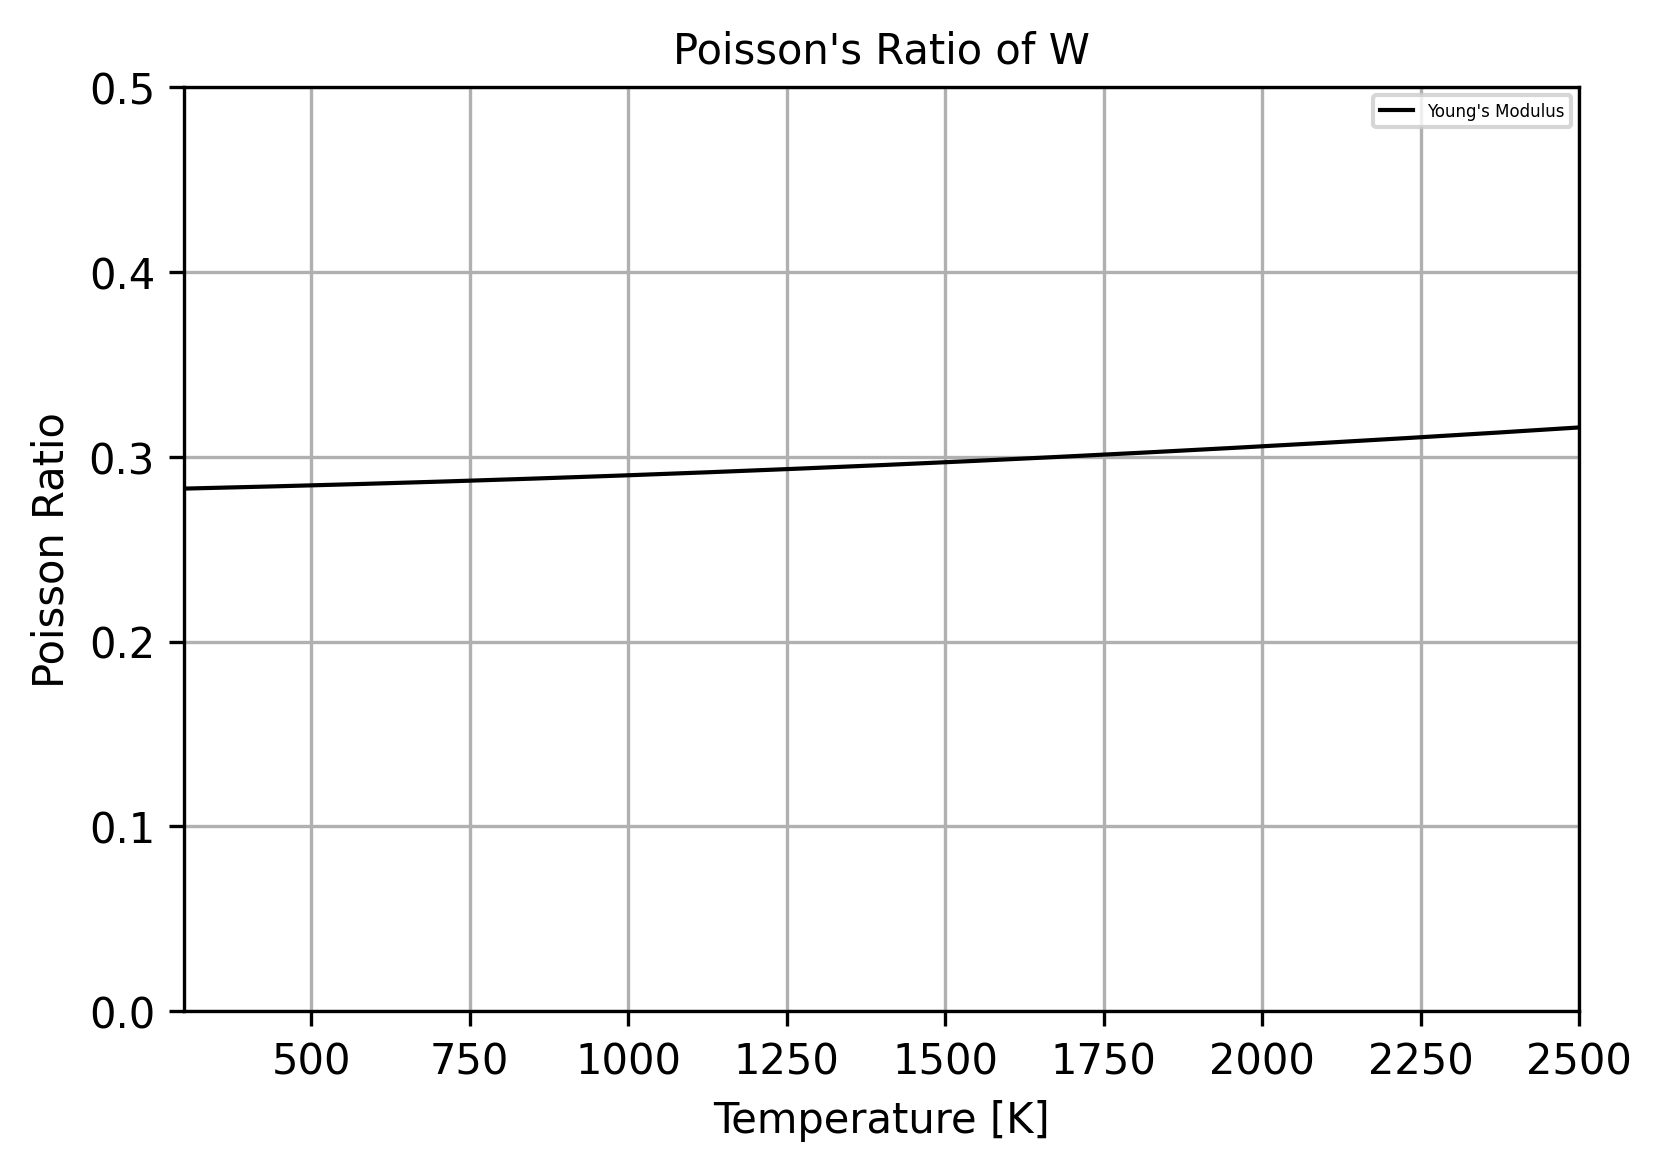


**Data Source:**  
- [Tolias2017--thermophysical properties of solid and liquid tungsten relevant](https://drive.google.com/file/d/1yjf497SdhnkfiJqxQwKkY1LkHd0omkAP/view?usp=drive_link)


In [12]:
def Poisson(T):
    return 0.28063 + 6.1902e-6*T + 3.162e-9*T**2
    
# Calculate the elastic modulus (E) in GPa
T = np.linspace(0,3500,3500)
V = np.array([Poisson(t) for t in T])

DATAPLOT(
        x_label='Temperature [K]',
        y_label='Poisson Ratio',
        fit_labels=["Young's Modulus"],
        title="Poisson's Ratio of W",
        x_fit_list=[T],
        y_fit_list=[V],
        x_lim=[300, 2500],
        y_lim=[0, 0.5]
)

display(Markdown("""
**Data Source:**  
- [Tolias2017--thermophysical properties of solid and liquid tungsten relevant](https://drive.google.com/file/d/1yjf497SdhnkfiJqxQwKkY1LkHd0omkAP/view?usp=drive_link)
"""))

<a id=Hardness></a>
<h3>3.3. Hardness</h3m> 

,W Temp (C),W Hardness (VHN)
2,1200.408092,472.843729
3,1300.438301,446.403085
4,1398.957157,442.182956
5,1499.186996,373.181332
6,1599.562582,373.106427


**Fitting parameters for Tungsten W_hardness** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 5
    # variables        = 2
    chi-square         = 919.339357
    reduced chi-square = 306.446452
    Akaike info crit   = 30.0710870
    Bayesian info crit = 29.2899629
    R-squared          = 0.89004103
[[Variables]]
    c0:  804.494646 +/- 78.1062266 (9.71%) (init = 1)
    c1: -0.27359308 +/- 0.05552068 (20.29%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c0, c1) = -0.9950


**The equations for Tungsten W_hardness are:**


Fit:


<IPython.core.display.Latex object>

Minimum of confidence interval:


<IPython.core.display.Latex object>

Maximum of confidence interval:


<IPython.core.display.Latex object>

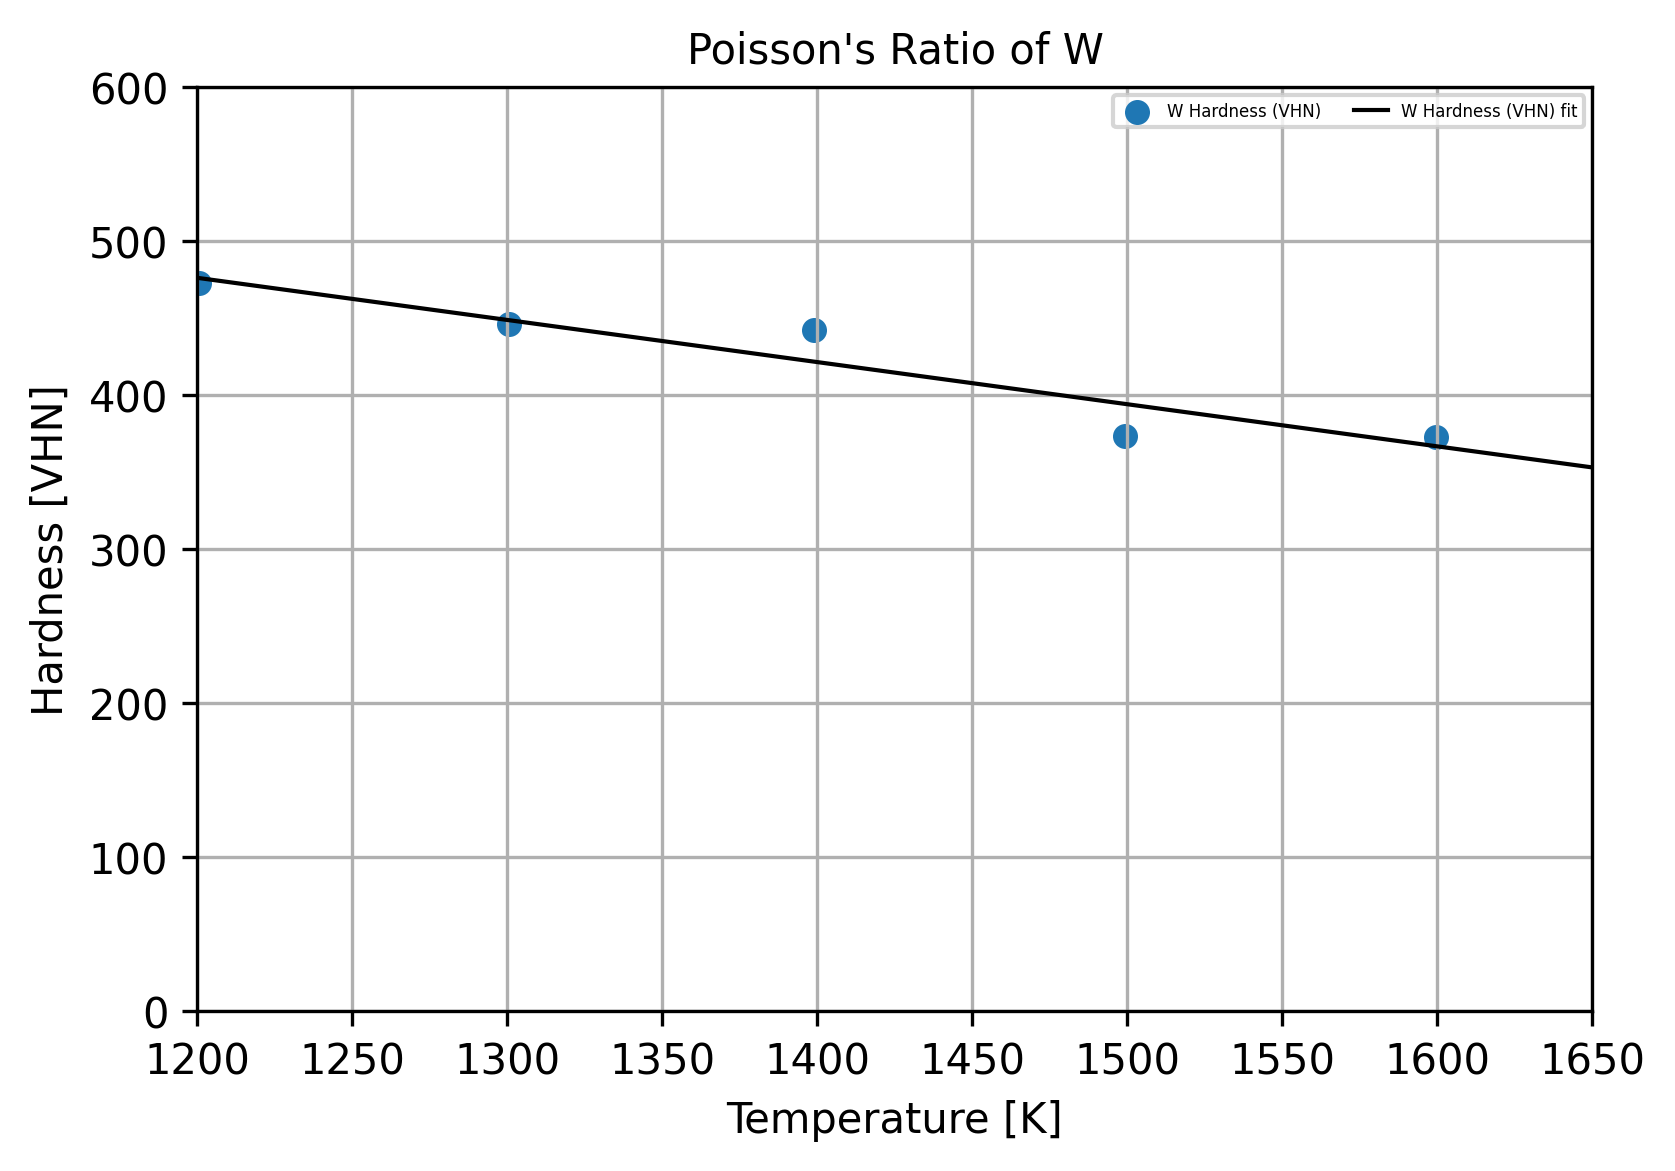


**Data Source:**  
- [Schmnidt1963--THE ENGINEERING PROPERTIES OF TUNGSTEN AND TUNGSTEN ALLOYS.pdf](https://drive.google.com/file/d/1zVKWktn90TJ5NX6dQBbdpRMyT2ylgfMw/view?usp=drive_link)


In [14]:
material_property = "W_hardness"
df = LOADDATA(
    excel_filename = excel_filename,
    material_property = material_property
)

data_labels = np.array(df.keys())[1::2]
x_data_list = [np.array(df[i].dropna()) for i in df.iloc[:, ::2] + 273.15]
y_data_list = [np.array(df[i].dropna()) for i in df.iloc[:, 1::2]]
T_data, Y_data = concatenate_and_sort(x_data_list, y_data_list)

p = [1, 1]
T = np.linspace(1200, 1650, 1000)
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)

x_fit_list = [T]
y_fit_list = [fit_result.eval(fit_result.params, x=T)]


DATAPLOT(
        x_data_list=x_data_list,
        y_data_list=y_data_list,
        x_label='Temperature [K]',
        y_label='Hardness [VHN]',
        title="Poisson's Ratio of W",
        data_labels = data_labels,
        x_fit_list=x_fit_list,
        y_fit_list=y_fit_list,
        x_lim=[1200, 1650],
        y_lim=[0, 600]
)


Hardness_coeff  = [fit_result.params[key].value for key in fit_result.params]  # Extract parameter values as a list

def Hardness(T):
    return sum(Hardness_coeff[i] * T**i for i in range(len(Hardness_coeff)))

display(Markdown("""
**Data Source:**  
- [Schmnidt1963--THE ENGINEERING PROPERTIES OF TUNGSTEN AND TUNGSTEN ALLOYS.pdf](https://drive.google.com/file/d/1zVKWktn90TJ5NX6dQBbdpRMyT2ylgfMw/view?usp=drive_link)
"""))

<a id=UltimateTensileStrength></a>
<h3>3.4. Ultimate Tensile Strength</h3m> 

,W Nogami Temp (K),W Nogami Ultimate Strength (MPa),W k-doped WRe fit Temp (K),W k-doped WRe fit Ultimate Strength (MPa)
2,300.271407,855.095791,301.274589,1222.056173
3,369.255313,899.235470,370.628186,1115.518743
4,464.928714,754.358221,468.931906,868.259461
5,560.659772,631.467346,564.173107,850.706058
6,663.720903,539.374967,672.879543,843.559442
7,765.321406,581.395808,767.969174,768.206841
8,868.509735,537.672221,870.450821,716.584498
9,979.012107,518.152954,973.103472,730.171507
10,1169.224935,487.833282,1175.720650,663.971667
11,1375.075842,428.970876,1372.299589,624.433575


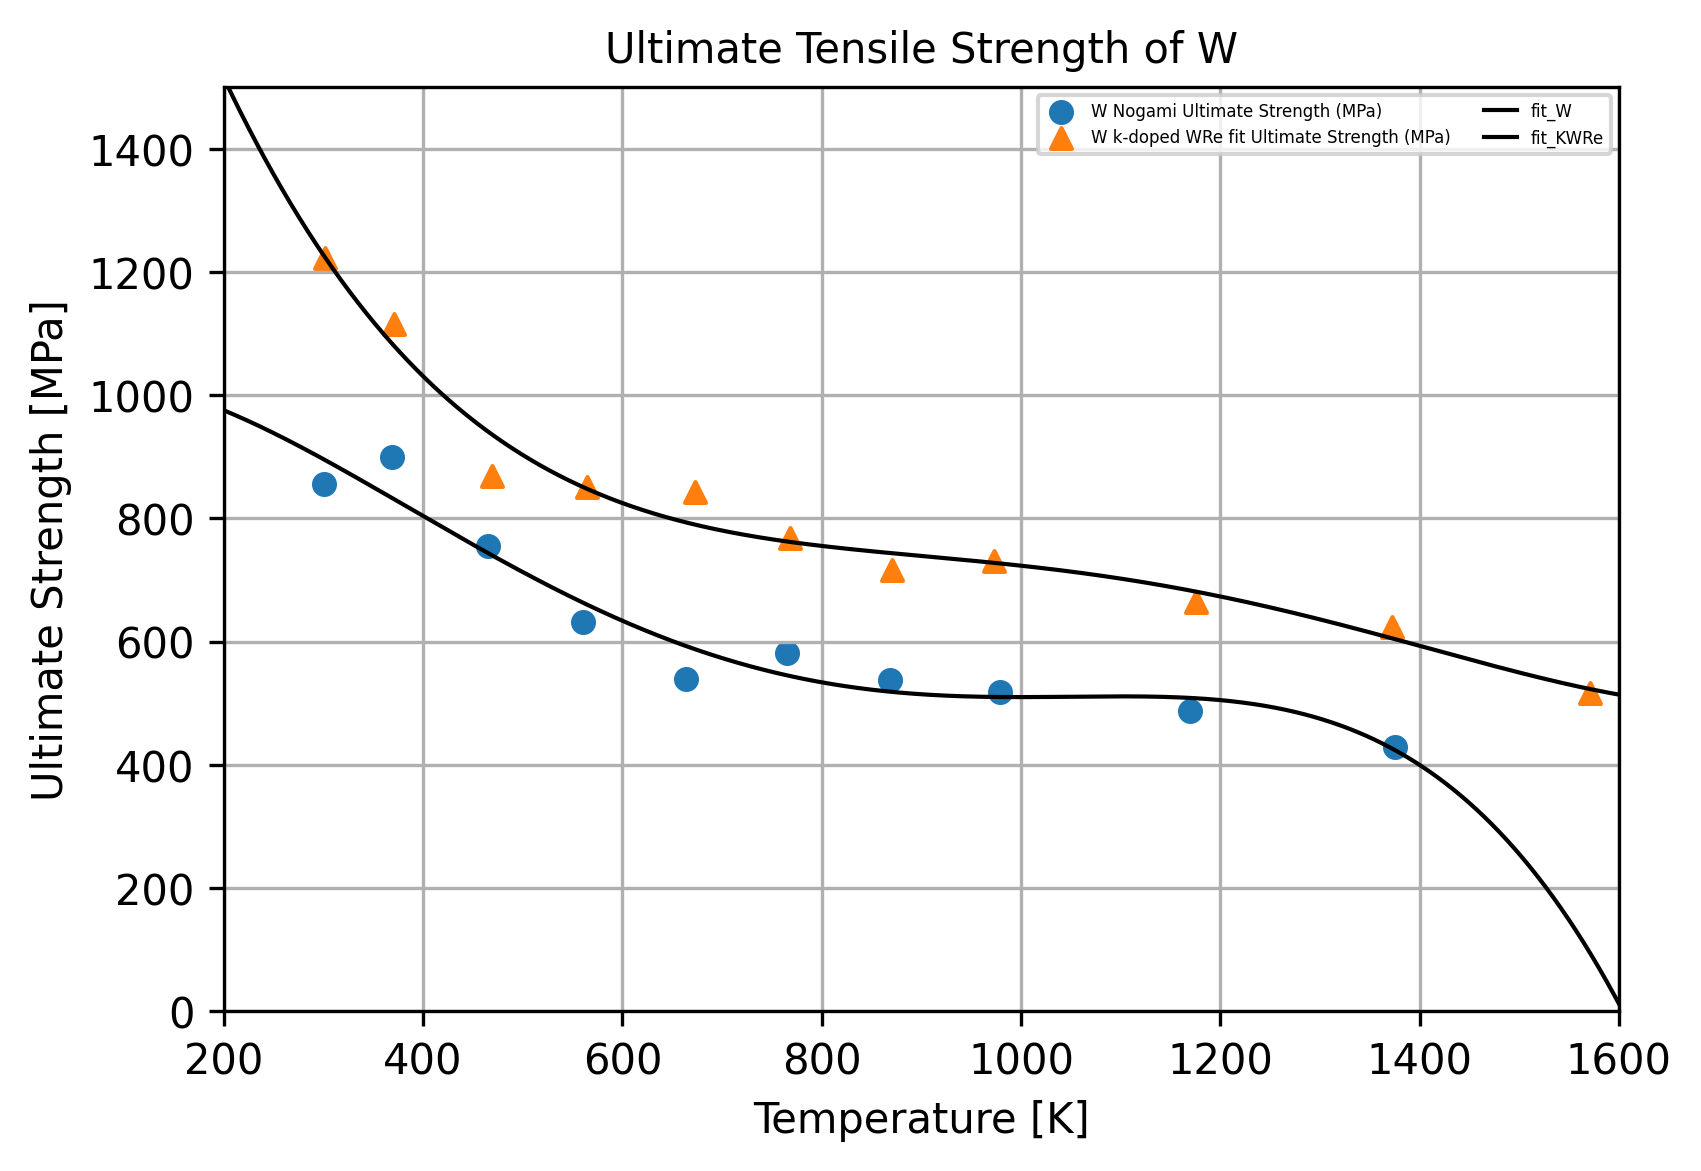


**Data Source:**  
- [Nogami2021-- Mechanical properties of tungsten-Recent research on modified tungsten materials in Japan](https://drive.google.com/file/d/1zauZKW21QloQ4LA3BcDXD8PHHT6UuJVX/view?usp=drive_link)
- [Shen2016--Microstructure and tensile properties of tungsten at elevated temperatures](https://drive.google.com/file/d/1IIk2v-ePELq5WsIQB9tqCQz1X9w4669M/view?usp=drive_link)


In [16]:
material_property = "W_Ultimate Strength"
df = LOADDATA(
    excel_filename = excel_filename,
    material_property = material_property
)

data_labels = np.array(df.keys())[1::2]
x_data_list = [np.array(df[i].dropna()) for i in df.iloc[:, ::2]]
y_data_list = [np.array(df[i].dropna()) for i in df.iloc[:, 1::2]]

tensile_strength_W_func = lambda T: (-1.6308e-9 * T**4 + 4.6877e-6 * T**3 - 3.974e-3 * T**2 + 4.0936e-1 * T + 1.0176e3)
tensile_strength_KWRe_func = lambda T: (1.1267e-9 * T**4 - 5.2117e-6 * T**3 + 8.6057e-3 * T**2 - 6.26 * T + 2.4625e3)

T = np.linspace(200, 1600, 2000)
Y_fit_W = tensile_strength_W_func(T)
Y_fit_KWRe = tensile_strength_KWRe_func(T)

DATAPLOT(
        x_data_list=x_data_list,
        y_data_list=y_data_list,
        x_label='Temperature [K]',
        y_label='Ultimate Strength [MPa]',
        title="Ultimate Tensile Strength of W",
        data_labels = data_labels,
        fit_labels=["fit_W", "fit_KWRe"],
        x_fit_list=[T,T],
        y_fit_list=[Y_fit_W, Y_fit_KWRe],
        x_lim=[200, 1600],
        y_lim=[0, 1500]
)

UltimateStrength = tensile_strength_W_func

display(Markdown("""
**Data Source:**  
- [Nogami2021-- Mechanical properties of tungsten-Recent research on modified tungsten materials in Japan](https://drive.google.com/file/d/1zauZKW21QloQ4LA3BcDXD8PHHT6UuJVX/view?usp=drive_link)
- [Shen2016--Microstructure and tensile properties of tungsten at elevated temperatures](https://drive.google.com/file/d/1IIk2v-ePELq5WsIQB9tqCQz1X9w4669M/view?usp=drive_link)
"""))

<a id=YieldStrength></a>
<h3>3.5. Yield Strength</h3m> 

,W Plansee Temp (K),W Plansee Yield Strength (MPa),W Drury Temp (K),W Drury Yield Strength (MPa),W Streichen Temp (K),W Streichen Yield Strength (MPa),W Shen Temp (K),W Shen Yield Strength (MPa),W Skoro SW Temp (K),W Skoro SW Yield Strength (MPa),W Skoro HR Temp (K),W Skoro HR Yield Strength (MPa)
2,472.0,1222.05,291.359853,1377.464963,321.959608,1290.896024,471.086464,668.829189,1719.556262,85.381738,1962.194579,51.986327
3,501.0,1182.21,808.495716,897.391796,471.898409,909.971511,523.717640,605.793381,1772.407427,80.581656,2015.209410,46.934924
4,527.0,1147.42,1099.193390,696.247691,661.616891,710.697735,574.477599,510.297814,1825.258593,73.248199,2072.024380,42.330818
5,552.0,1113.33,1374.591187,474.358389,863.575275,580.628275,623.065518,473.581928,1924.354529,63.914707,2132.625355,37.319386
6,578.0,1079.23,1637.749082,242.102842,1080.833537,483.417732,673.019885,472.422487,2018.495668,54.447880,2231.178584,33.810091
7,603.0,1044.44,1916.206854,70.394718,1258.312118,432.986612,722.102376,435.702777,2117.591604,44.314374,2292.530702,28.350929
8,628.0,1010.34,2200.784578,35.390111,NaN,NaN,471.140000,652.591662,2229.900331,36.314239,2373.683791,27.651338
9,664.0,976.25,2479.242350,24.621418,NaN,NaN,521.864268,567.921113,2325.693069,31.247486,2473.004317,24.671021
10,679.0,942.15,NaN,NaN,NaN,NaN,572.644622,466.239822,2429.743801,27.247418,2573.097525,22.545251
11,705.0,907.36,NaN,NaN,NaN,NaN,621.168807,448.854325,2527.188138,23.114015,NaN,NaN


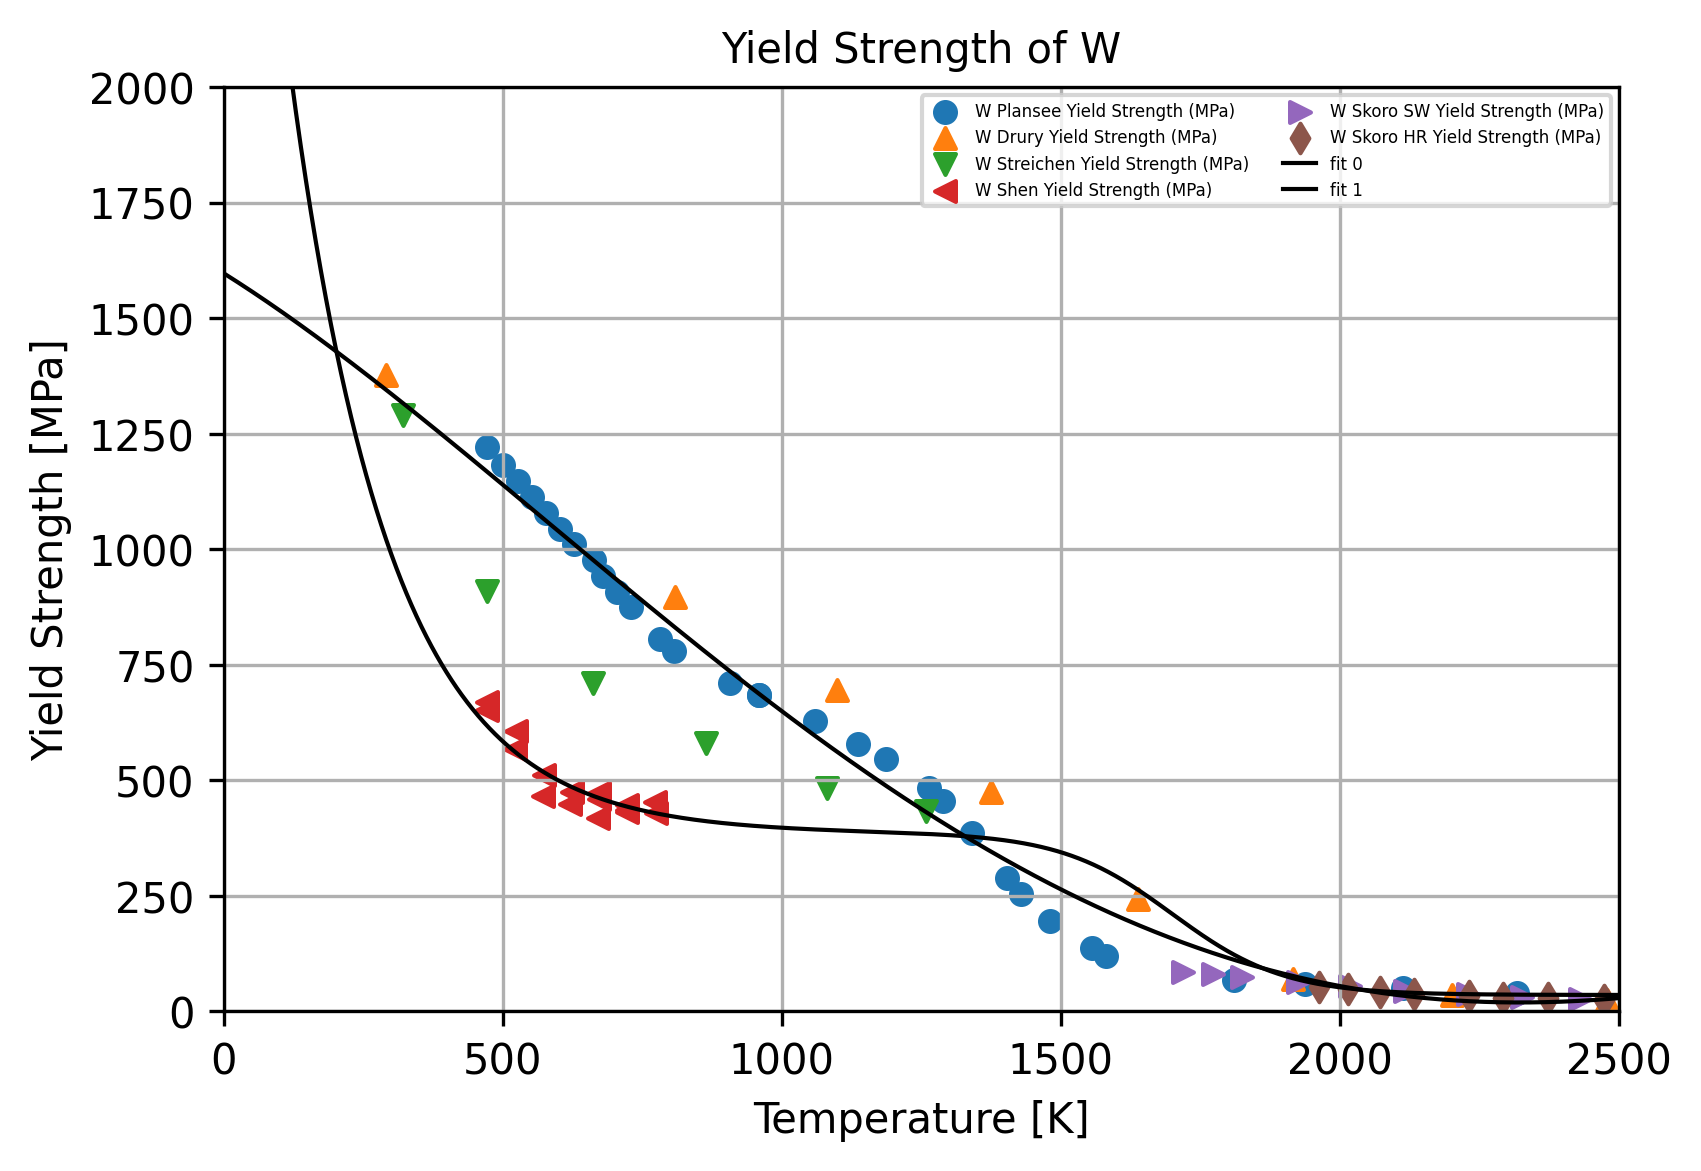

In [17]:
material_property = "W_Yield_Strength"
df = LOADDATA(
    excel_filename = excel_filename,
    material_property = material_property
)

data_labels = np.array(df.keys())[1::2]
x_data_list = [np.array(df[i].dropna()) for i in df.iloc[:, ::2]]
y_data_list = [np.array(df[i].dropna()) for i in df.iloc[:, 1::2]]

def yield_strength_func0(T):
    a0, a1, a2 = 35, 3200, 350
    T1, T2, Tw = 180, 1700, 200
    term1 = a0
    term2 = a1 * np.exp(-T / T1)
    term3 = a2 * (1 - (1 + np.tanh((T - T2) / Tw)) / 2)
    return term1 + term2 + term3

yield_strength_func1 = lambda T: -4.335e-11 * T**4 + 3.126e-7 * T**3 - 0.000458 * T**2 - 0.7589 * T + 1597

T = np.linspace(0,2500,2500)
Y_fit_avg0 = yield_strength_func0(T)
Y_fit_avg1 = yield_strength_func1(T)

DATAPLOT(
        x_data_list=x_data_list,
        y_data_list=y_data_list,
        x_label='Temperature [K]',
        y_label='Yield Strength [MPa]',
        title="Yield Strength of W",
        data_labels = data_labels,
        fit_labels=["fit 0", "fit 1"],
        x_fit_list=[T,T],
        y_fit_list=[Y_fit_avg0, Y_fit_avg1],
        x_lim=[0, 2500],
        y_lim=[0, 2000]
)

YieldStrength = yield_strength_func0

<a id=UniformElongation></a>
<h3>3.6. Uniform Elongation</h3m> 

,W Nogami Temp (K),W Nogami Uniform Elongation (%),W K-doped WRe Nogami Temp (K),W K-doped WRe Nogami Uniform Elongation (%),W HR-EP Temp (K),W HR-EP Uniform Elongation (%),W HR-AM Temp (K),W HR-AM Uniform Elongation (%),W Forge Temp (K),W Forge Uniform Elongation (%)
2,367.835592,0.000000,305.879419,13.924411,523.150000,6.556886,523.150000,6.257485,522.588202,1.407253
3,472.526643,2.695494,372.482392,7.253985,573.150000,6.670659,473.150000,2.131737,573.150000,3.437126
4,566.722526,4.983728,475.676812,10.654594,623.150000,9.778443,572.588202,7.808451,623.150000,2.652695
5,677.662117,3.885376,579.500423,8.474716,673.150000,8.215569,623.150000,6.604790,623.150000,4.089820
6,767.527302,1.505613,673.085579,4.594534,722.588202,6.353361,623.150000,5.526946,673.150000,3.844311
7,861.252384,1.231024,764.355158,6.120448,773.711798,5.149633,672.026404,5.401332,673.150000,3.125749
8,975.782843,0.773378,877.936681,3.025022,NaN,NaN,722.588202,6.353361,723.150000,4.257485
9,1178.971554,0.819142,973.728812,2.153071,NaN,NaN,773.150000,3.293413,723.150000,2.520958
10,1373.502568,1.002201,1163.939042,1.935083,NaN,NaN,NaN,NaN,723.711798,2.161609
11,1567.338481,25.760893,1369.038425,1.717095,NaN,NaN,NaN,NaN,773.150000,3.652695


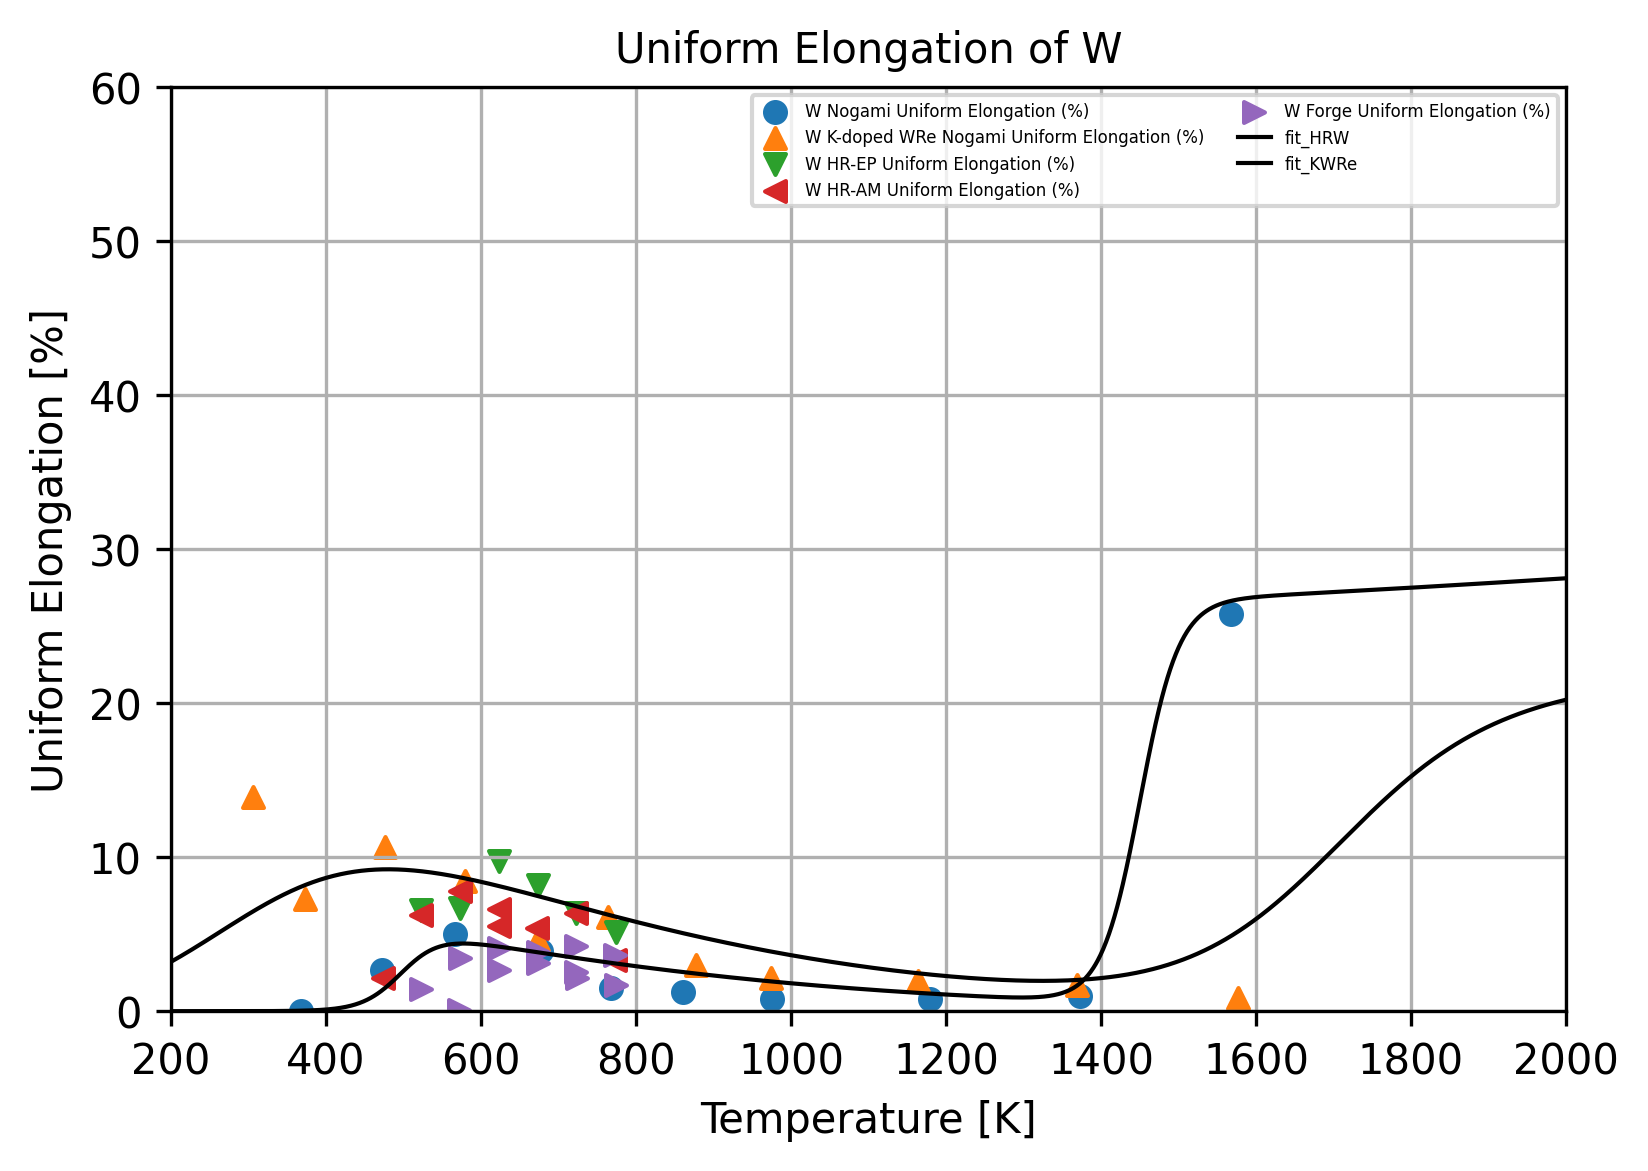


**Data Source:**  
- [Nogami2021-- Mechanical properties of tungsten-Recent research on modified tungsten materials in Japan](https://drive.google.com/file/d/1zauZKW21QloQ4LA3BcDXD8PHHT6UuJVX/view?usp=drive_link)
- [Shen2016--Microstructure and tensile properties of tungsten at elevated temperatures](https://drive.google.com/file/d/1IIk2v-ePELq5WsIQB9tqCQz1X9w4669M/view?usp=drive_link)


In [18]:
material_property = "W_Uniform_Elongation"
df = LOADDATA(
    excel_filename = excel_filename,
    material_property = material_property
)

data_labels = np.array(df.keys())[1::2]
x_data_list = [np.array(df[i].dropna()) for i in df.iloc[:, ::2]]
y_data_list = [np.array(df[i].dropna()) for i in df.iloc[:, 1::2]]

def elongation_HRW_func(T):
    T1, T2, Tw = 500, 1450, 50
    e0, e_max, a, b = 4, 25, 0.06, 0.0035
    term1 = a * T * np.exp(-b * T) * (1 + np.tanh((T - T1) / Tw)) / 2
    term2 = (e_max + b * T - e0) * (1 + np.tanh((T - T2) / Tw)) / 2
    return term1 + term2

def elongation_KWRe_func(T):
    T1, T2, Tw = 300, 1700, 200
    e0, e_max, a, b = 6.0, 20, 0.12, 0.0035
    term1 = a * T * np.exp(-b * T) * (1 + np.tanh((T - T1) / Tw)) / 2
    term2 = (e_max + b * T - e0) * (1 + np.tanh((T - T2) / Tw)) / 2
    return term1 + term2

T = np.linspace(200, 2000, 2000)
Y_fit_HRW = elongation_HRW_func(T)
Y_fit_KWRe = elongation_KWRe_func(T)

DATAPLOT(
        x_data_list=x_data_list,
        y_data_list=y_data_list,
        x_label='Temperature [K]',
        y_label='Uniform Elongation [%]',
        title="Uniform Elongation of W",
        data_labels = data_labels,
        fit_labels=["fit_HRW", "fit_KWRe"],
        x_fit_list=[T,T],
        y_fit_list=[Y_fit_HRW, Y_fit_KWRe],
        x_lim=[200, 2000],
        y_lim=[0, 60]
)

UniformElongation = elongation_HRW_func

display(Markdown("""
**Data Source:**  
- [Nogami2021-- Mechanical properties of tungsten-Recent research on modified tungsten materials in Japan](https://drive.google.com/file/d/1zauZKW21QloQ4LA3BcDXD8PHHT6UuJVX/view?usp=drive_link)
- [Shen2016--Microstructure and tensile properties of tungsten at elevated temperatures](https://drive.google.com/file/d/1IIk2v-ePELq5WsIQB9tqCQz1X9w4669M/view?usp=drive_link)
"""))

<a id=TotalElongation></a>
<h3>3.7. Total Elongation</h3m> 

,W Nogami Temp (K),W Nogami Total Elongation (%),W K-doped WRe Nogami Temp (K),W K-doped WRe Nogami Total Elongation (%),W HR-EP Temp (K),W HR-EP Total Elongation (%),W HR-AM Temp (K),W HR-AM Total Elongation (%),W Forge Temp (K),W Forge Total Elongation (%)
2,356.249903,0.000000,288.019489,19.164391,298.430899,0.116733,297.307303,0.176748,422.588202,1.419229
3,464.349493,16.997835,354.972079,6.314556,422.588202,0.161744,473.711798,2.191549,423.150000,0.281437
4,568.541869,21.712477,442.803079,14.925112,472.588202,0.095876,472.588202,3.389289,472.588202,1.173720
5,657.105388,14.084181,537.105825,21.097883,523.150000,11.646707,522.588202,13.143780,523.150000,0.029940
6,762.600168,13.243073,627.491153,15.086792,573.150000,18.766467,571.464607,31.101998,523.711798,1.646639
7,862.885330,10.619602,726.492811,16.385145,623.711798,29.658615,572.026404,34.095943,573.150000,0.562874
8,1165.043219,10.773616,823.521462,11.310389,673.711798,29.592747,622.588202,31.275516,573.711798,3.975981
9,1372.125566,16.293678,920.807479,11.296813,722.588202,35.634798,622.588202,28.760546,623.711798,5.287358
10,1562.276651,61.802713,1107.230258,13.145323,774.273596,36.227410,623.150000,25.407186,623.711798,13.610711
11,NaN,NaN,1288.711055,15.088250,NaN,NaN,672.588202,31.808451,673.150000,14.682635


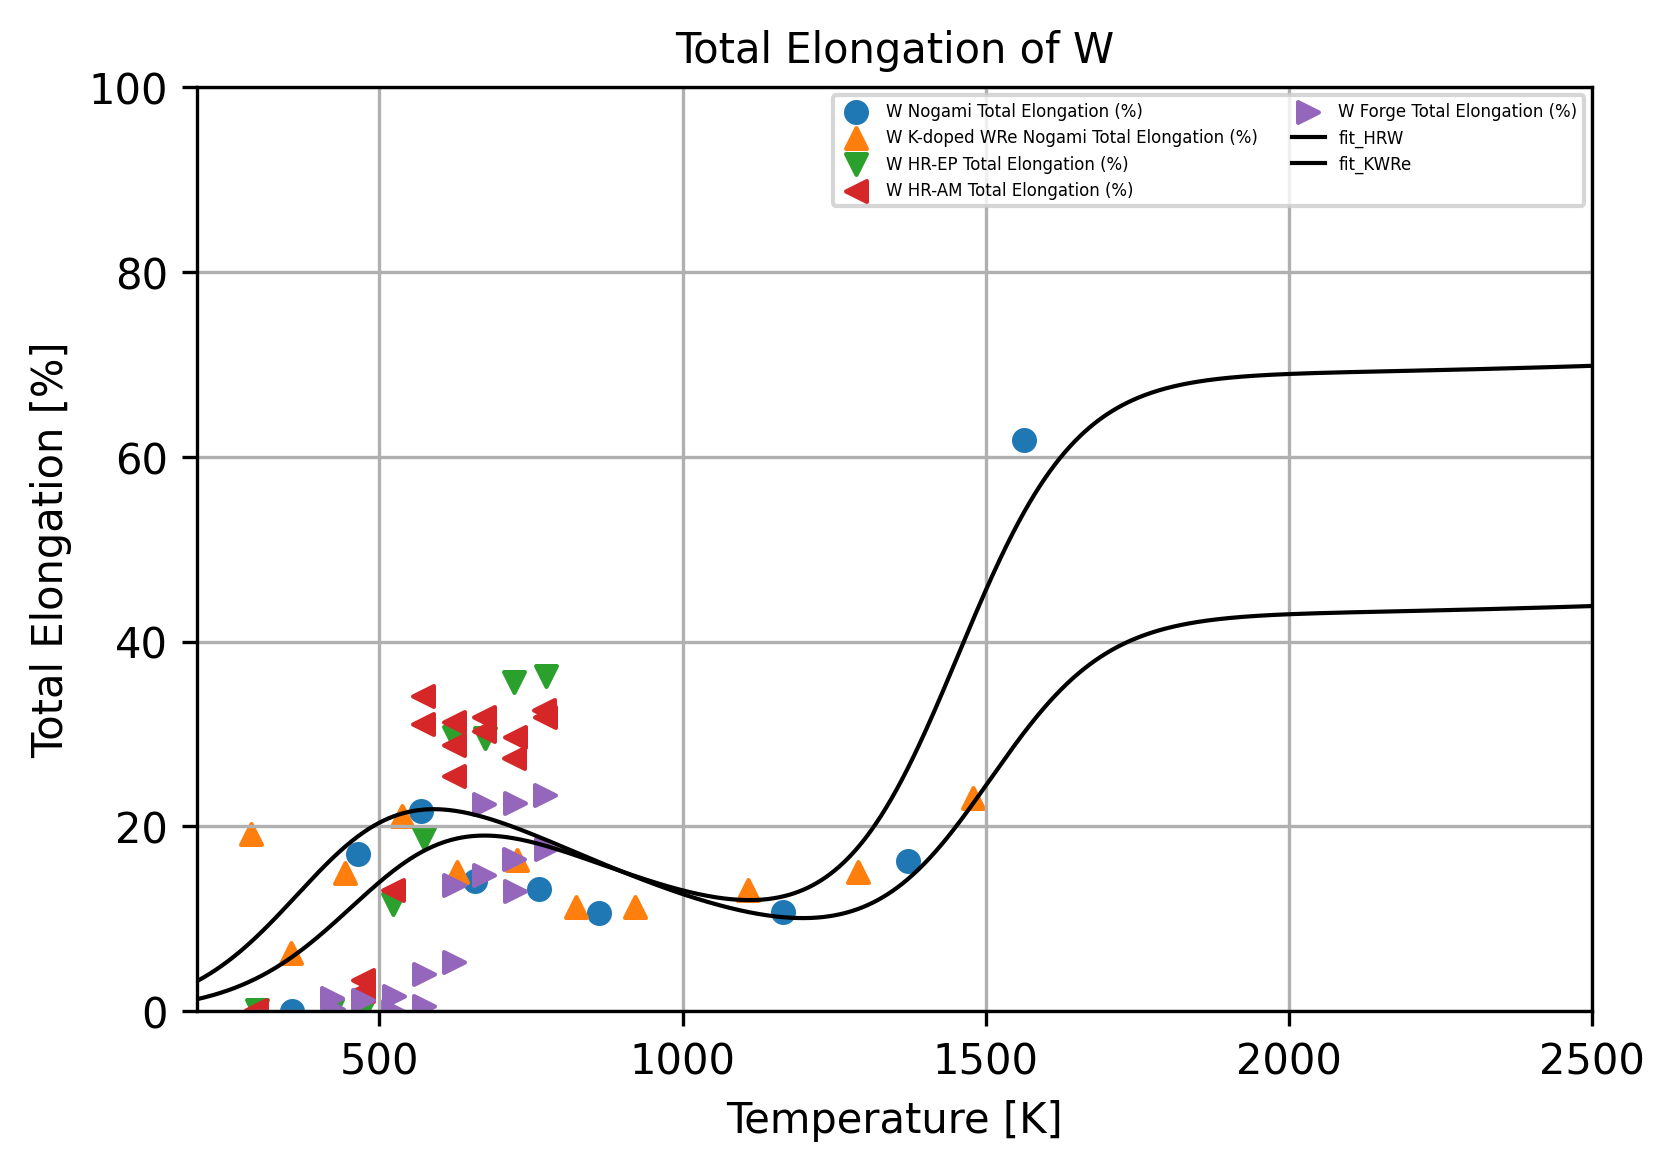


**Data Source:**  
- [Nogami2021-- Mechanical properties of tungsten-Recent research on modified tungsten materials in Japan](https://drive.google.com/file/d/1zauZKW21QloQ4LA3BcDXD8PHHT6UuJVX/view?usp=drive_link)
- [Shen2016--Microstructure and tensile properties of tungsten at elevated temperatures](https://drive.google.com/file/d/1IIk2v-ePELq5WsIQB9tqCQz1X9w4669M/view?usp=drive_link)


In [19]:
material_property = "W_Total_Elongation"
df = LOADDATA(
    excel_filename = excel_filename,
    material_property = material_property
)

data_labels = np.array(df.keys())[1::2]
x_data_list = [np.array(df[i].dropna()) for i in df.iloc[:, ::2]]
y_data_list = [np.array(df[i].dropna()) for i in df.iloc[:, 1::2]]

def total_elongation_HRW_func(T):
    T1, T2, Tw = 500, 1450, 200
    e0, e_max, a, b = 8, 70, 0.25, 0.003
    term1 = a * T * np.exp(-b * T) * (1 + np.tanh((T - T1) / Tw)) / 2
    term2 = (e_max + b * T - e0) * (1 + np.tanh((T - T2) / Tw)) / 2
    return term1 + term2

def total_elongation_KWRe_func(T):
    T1, T2, Tw = 400, 1500, 200
    e0, e_max, a, b = 4, 40, 0.25, 0.003
    term1 = a * T * np.exp(-b * T) * (1 + np.tanh((T - T1) / Tw)) / 2
    term2 = (e_max + b * T - e0) * (1 + np.tanh((T - T2) / Tw)) / 2
    return term1 + term2

T = np.linspace(200, 2500, 2500)
Y_fit_HRW = total_elongation_HRW_func(T)
Y_fit_KWRe = total_elongation_KWRe_func(T)

DATAPLOT(
        x_data_list=x_data_list,
        y_data_list=y_data_list,
        x_label='Temperature [K]',
        y_label='Total Elongation [%]',
        title="Total Elongation of W",
        data_labels = data_labels,
        fit_labels=["fit_HRW", "fit_KWRe"],
        x_fit_list=[T,T],
        y_fit_list=[Y_fit_HRW, Y_fit_KWRe],
        x_lim=[200, 2500],
        y_lim=[0, 100]
)
TotalElongation = total_elongation_HRW_func

display(Markdown("""
**Data Source:**  
- [Nogami2021-- Mechanical properties of tungsten-Recent research on modified tungsten materials in Japan](https://drive.google.com/file/d/1zauZKW21QloQ4LA3BcDXD8PHHT6UuJVX/view?usp=drive_link)
- [Shen2016--Microstructure and tensile properties of tungsten at elevated temperatures](https://drive.google.com/file/d/1IIk2v-ePELq5WsIQB9tqCQz1X9w4669M/view?usp=drive_link)
"""))


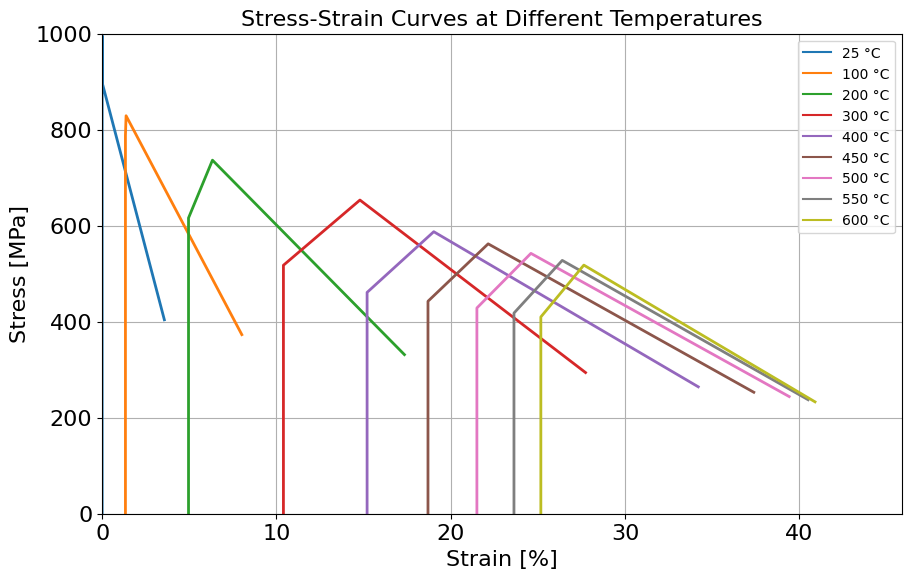

In [20]:
def FractureStrength(T): return 0.45*(UltimateStrength(T))

def YieldStrength(T):
    a0, a1, a2 = 35, 3200, 350
    T1, T2, Tw = 180, 1700, 200
    term1 = a0
    term2 = a1 * np.exp(-T / T1)
    term3 = a2 * (1 - (1 + np.tanh((T - T2) / Tw)) / 2)
    return term1 + term2 + term3

def stress_strain_curve(T, shift=0):
    x0, y0 = 0 + shift, 0
    
    # Point 1 (at Yield Strength with slope = Young's Modulus)
    y1 = YieldStrength(T)
    x1 = 1e-3*100*y1 / Young(T) + shift  # x1 = y1 / slope, modulus is in GPa and strain is in %
    
    # Point 2 (Ultimate strength at Uniform Elongation)
    x2 = UniformElongation(T) + shift
    y2 = UltimateStrength(T)
    
    # Point 3 (Fracture Strength at Total Elongation)
    x3 = TotalElongation(T) + shift
    y3 = FractureStrength(T)
    
    
    # Define the points for stress-strain
    x_values = [x0, x1, x2, x3]
    y_values = [y0, y1, y2, y3]
    
    return x_values, y_values

# Define a function to plot multiple stress-strain curves
def plot_multiple_stress_strain(temperatures, shift_percent=0.2):
    plt.figure()
    
    # Plot each curve with a shift in strain values
    for i, T in enumerate(temperatures):
        shift = i * shift_percent * TotalElongation(T)  # Shift by 20% of Total Elongation for clarity
        x_values, y_values = stress_strain_curve(T, shift=shift)
        plt.plot(x_values, y_values, marker='', linestyle='-', label=f'{T-273} °C')
    
    plt.xlabel('Strain [%]', fontsize=16)  # Set font size for x-axis label
    plt.ylabel('Stress [MPa]', fontsize=16)  # Set font size for y-axis label
    plt.title('Stress-Strain Curves at Different Temperatures', fontsize=16)  # Set font size for title
    
    
    # Modify legend position and line thickness, and remove data points
    plt.legend(loc='best', fontsize=10)  # Control legend position (e.g., 'upper right', 'lower left')
    
    # Control line thickness
    for line in plt.gca().get_lines():
        line.set_linewidth(2)  # Set the line thickness to 2
    
    # Control graph size and center it in the page
    plt.gcf().set_size_inches(10, 6)  # Set figure size (width, height in inches)
    plt.gcf().subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Centering the graph
    
    plt.grid(True)
    plt.xlim(0, max(x_values) + 5)  # Adjust x-axis limit for better visualization
    plt.ylim(0, 1000)  # Adjust y-axis limit as needed
    plt.tick_params(axis='both', which='major', labelsize=16)  # Set font size for tick labels
    plt.show()


temperatures = [273 + T for T in [25, 100, 200, 300, 400, 450, 500, 550, 600]]
plot_multiple_stress_strain(temperatures,0.2)

<a id=TangentModulus></a>
<h3>3.8.1. Tangent Modulus (Linear Hardening)</h3m>

<Figure size 1800x1200 with 0 Axes>

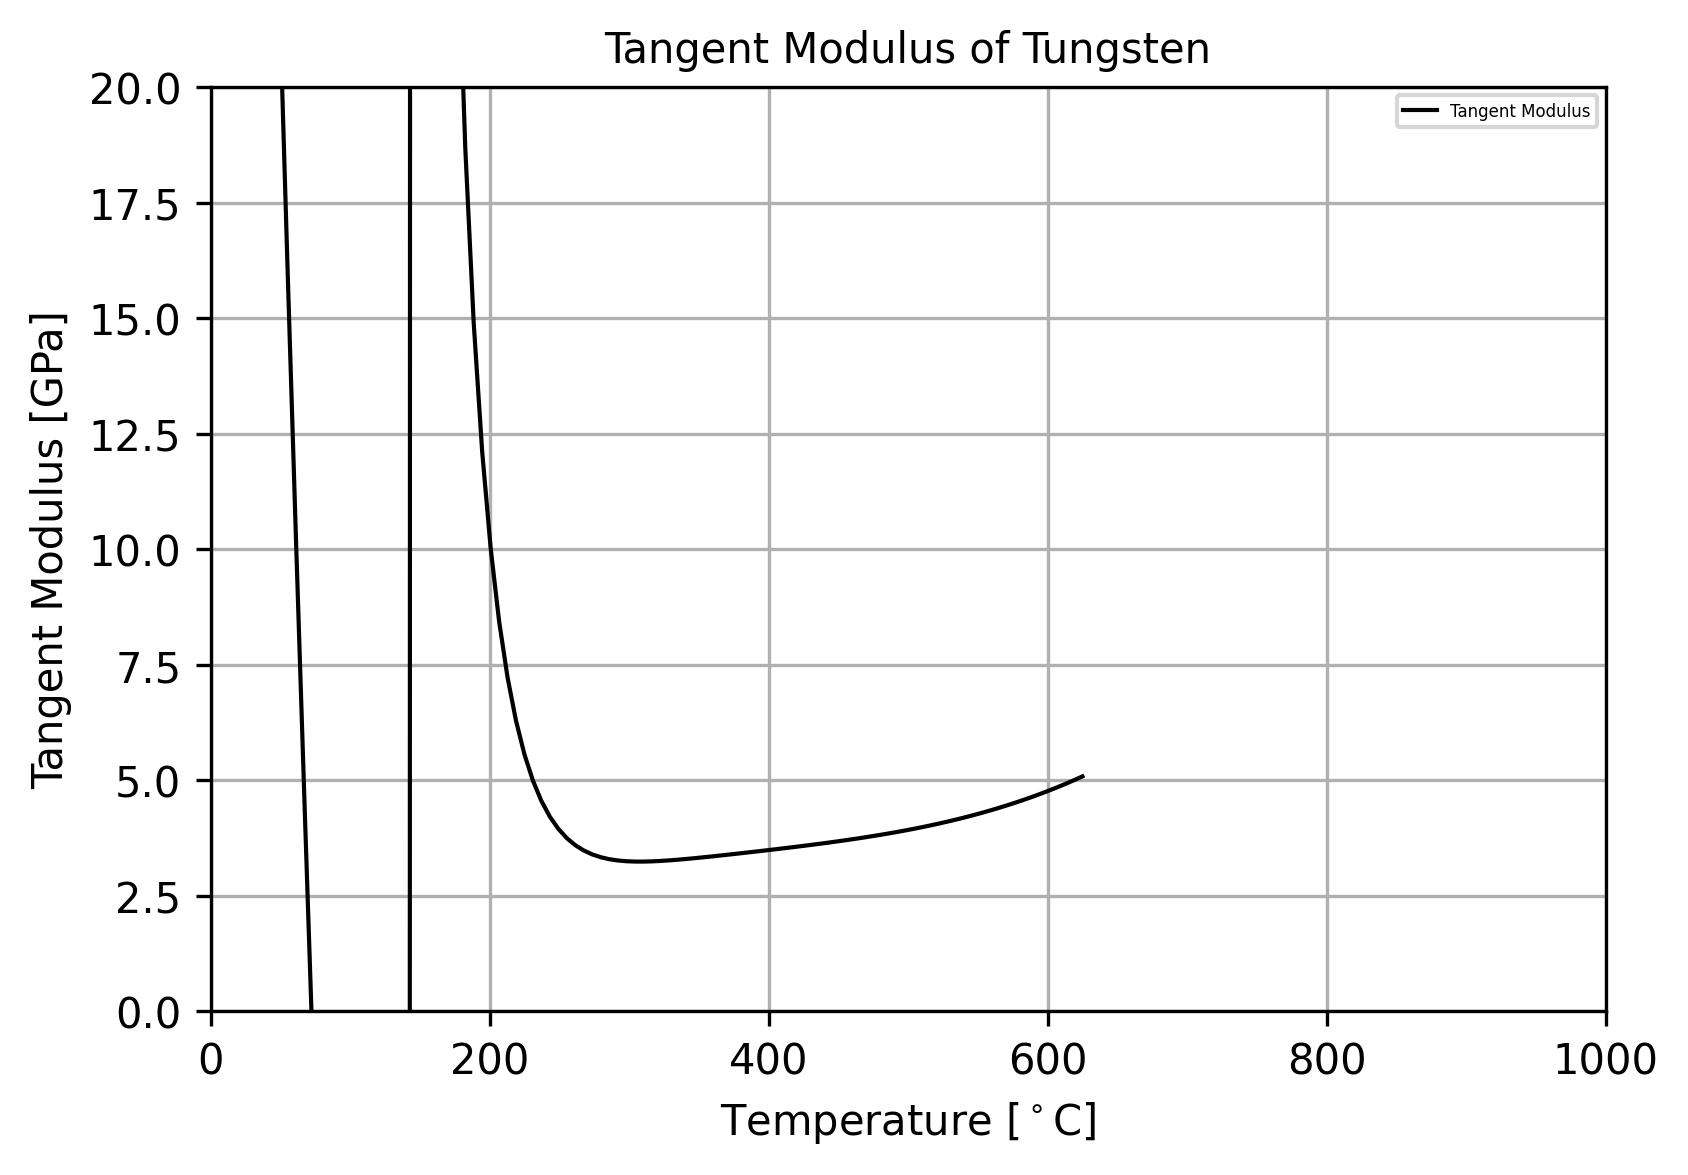

In [27]:
# Define the Tangent Modulus function
def TangentModulus(T):
    return 1e-3*(UltimateStrength(T) - YieldStrength(T)) / (UniformElongation(T)/100 - 0.002)  #GPa

# Define the temperature array (100 values between 25 and 625)
T_K = 273 + np.linspace(25, 625, 100)

# Calculate Tangent Modulus for each T
tangent_modulus_values = [TangentModulus(T) for T in T_K]
T_C=T_K-273

plt.figure(figsize=(6, 4), dpi=300)


DATAPLOT(
        x_label='Temperature [$^\circ$C]',
        y_label='Tangent Modulus [GPa]',
        title="Tangent Modulus of Tungsten",
        fit_labels=["Tangent Modulus"],
        x_fit_list=[T_C],
        y_fit_list=[tangent_modulus_values],
        x_lim=[0, 1000],
        y_lim=[0, 20]
)


<a id=Ramberg-Osgood></a>
<h3>3.8.2.  Stress-Strain Curves (Ramberg-Osgood)</h3m>
<h4>3.8.2.1 Strain hardening exponent

C:\Users\fuqih\AppData\Local\Temp\ipykernel_27548\3129802335.py:3: RuntimeWarning: invalid value encountered in scalar power
  return (np.log(UltimateStrength(T) / YieldStrength(T)))**0.75 / 6


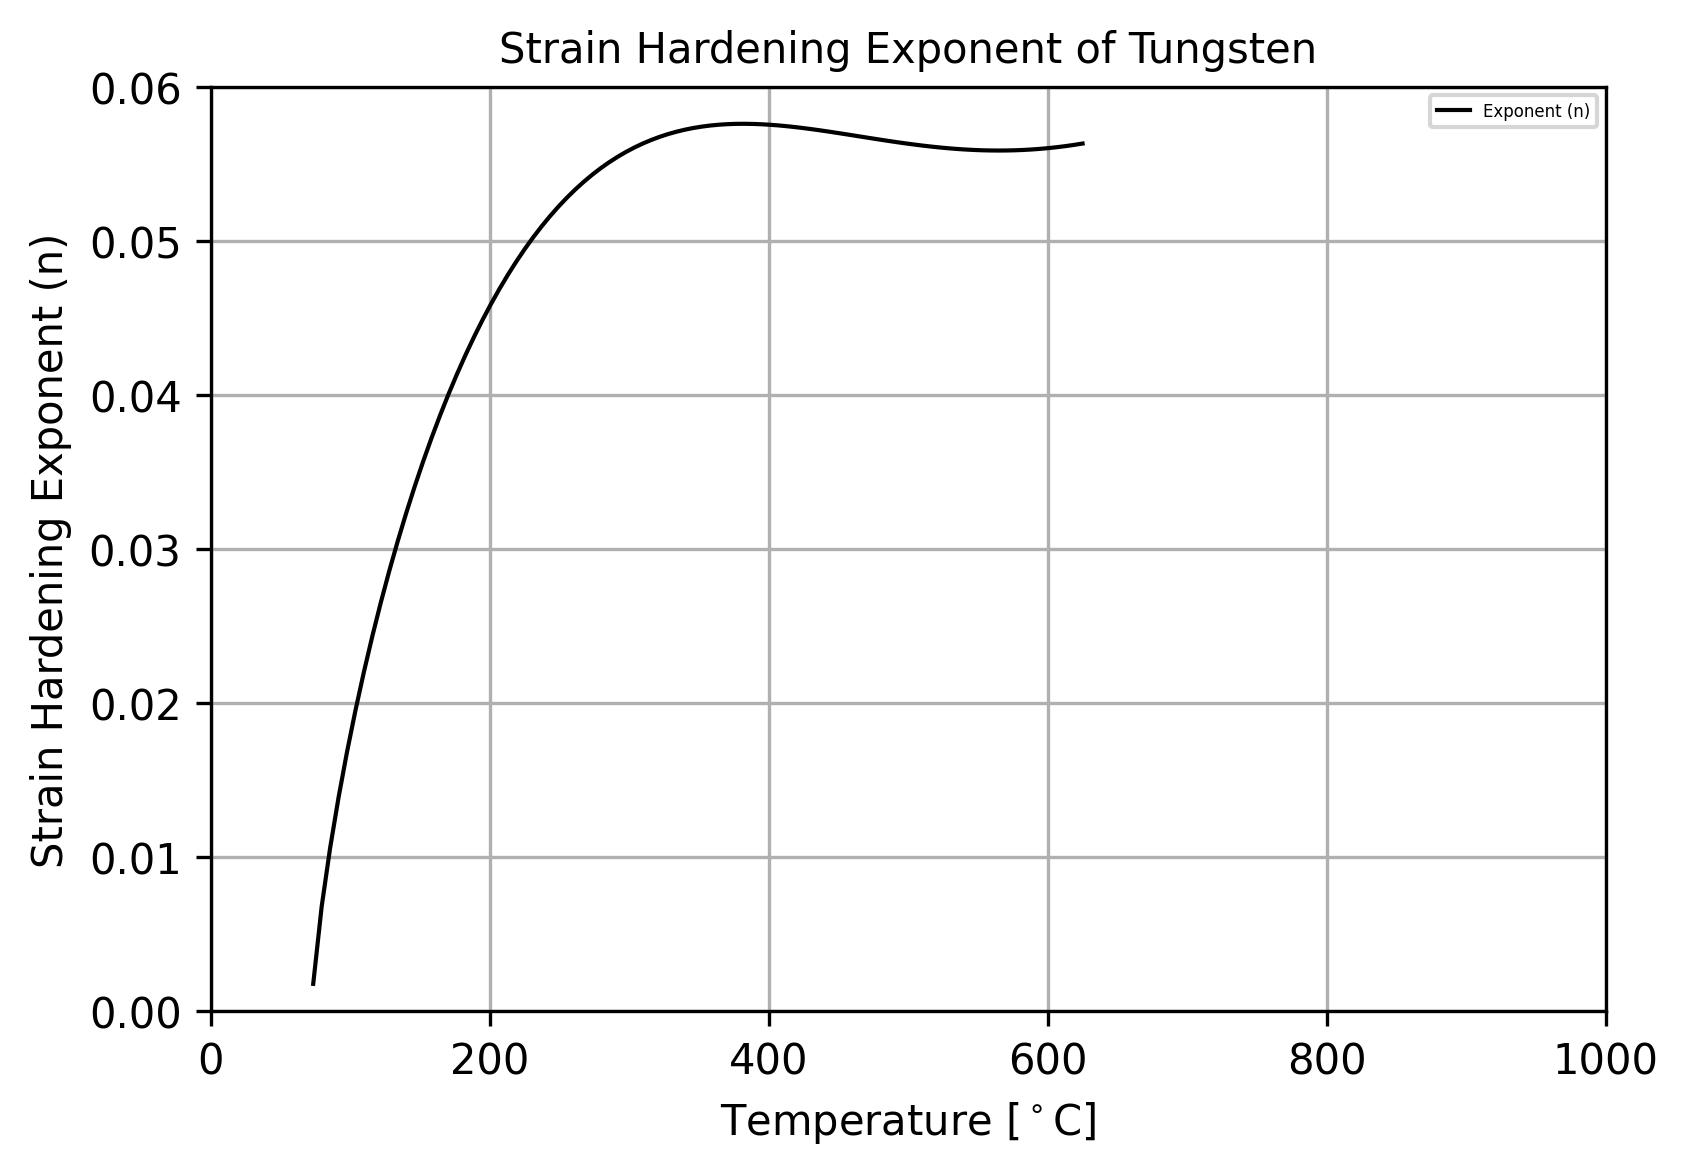

In [28]:
# Define the Tangent Modulus function
def StrainHardeningExponent(T):
    return (np.log(UltimateStrength(T) / YieldStrength(T)))**0.75 / 6

# Define the temperature array (100 values between 25 and 625)
T_K = 273 + np.linspace(25, 625, 100)

# Calculate Tangent Modulus for each T
exponent_values = [StrainHardeningExponent(T) for T in T_K]
T_C=T_K-273

DATAPLOT(
        x_label='Temperature [$^\circ$C]',
        y_label='Strain Hardening Exponent (n)',
        title="Strain Hardening Exponent of Tungsten",
        fit_labels=["Exponent (n)"],
        x_fit_list=[T_C],
        y_fit_list=[exponent_values],
        x_lim=[0, 1000],
        y_lim=[0, 0.06]
)